In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../')
from utils import utils, RWSampler
import Inference as inf

In [2]:
MIN_EXTREME_VALUE_Threshold = 22.24
Max_EXTREME_VALUE_Threshold = 54.36

In [3]:
import pandas as pd
train = pd.read_csv("/data2/hkaman/Livingston/EXPs/10m/EXP_BYHO/coords/train.csv")
test = pd.read_csv("/data2/hkaman/Livingston/EXPs/10m/EXP_BYHO/coords/test.csv")

In [6]:
test['block'].unique()

array(['LIV_005_2017', 'LIV_011_2017', 'LIV_025_2017', 'LIV_026_2017',
       'LIV_062_2017', 'LIV_090_2017', 'LIV_105_2017', 'LIV_114_2017',
       'LIV_135_2017', 'LIV_178_2017', 'LIV_181_2017', 'LIV_186_2017',
       'LIV_193_2017'], dtype=object)

In [7]:
train['block'].unique()

array(['LIV_003_2016', 'LIV_003_2019', 'LIV_007_2016', 'LIV_007_2019',
       'LIV_012_2016', 'LIV_012_2019', 'LIV_014_2016', 'LIV_014_2019',
       'LIV_016_2016', 'LIV_016_2019', 'LIV_017_2016', 'LIV_018_2016',
       'LIV_018_2019', 'LIV_038_2016', 'LIV_068_2016', 'LIV_076_2016',
       'LIV_076_2019', 'LIV_102_2016', 'LIV_102_2019', 'LIV_103_2016',
       'LIV_103_2019', 'LIV_107_2016', 'LIV_107_2019', 'LIV_111_2016',
       'LIV_111_2019', 'LIV_176_2019'], dtype=object)

## Initial Results

### Vanilla

In [3]:
exp_name = '00_lr001_wd05_drop30_vanilla'
vanilla = inf.performance(exp_name)

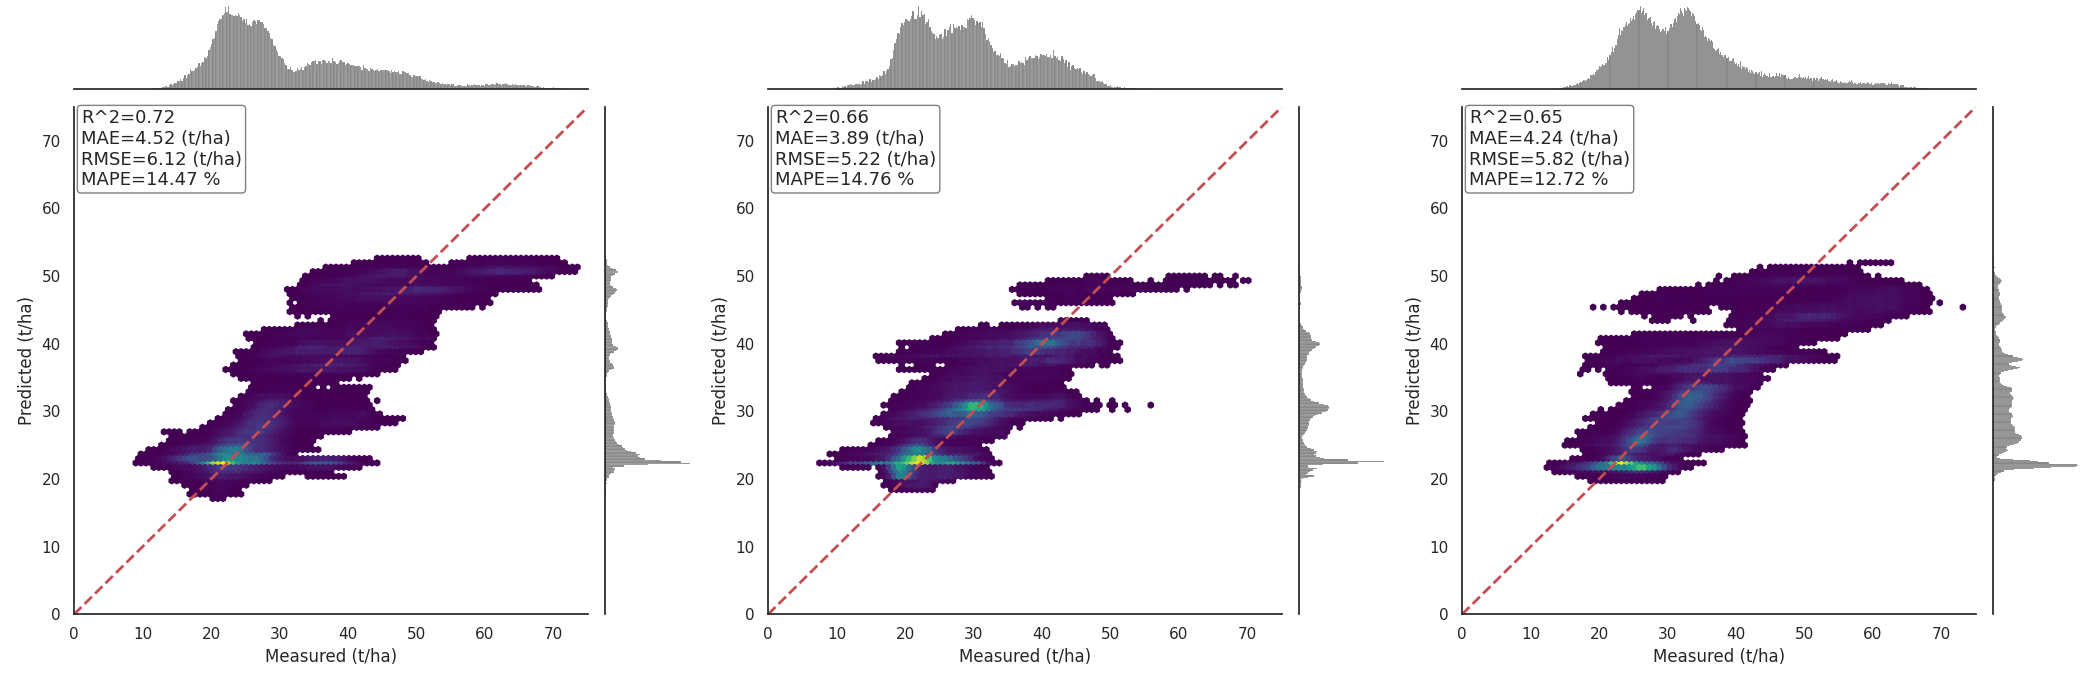

In [4]:
vanilla.scatter_plot()

In [5]:
_ = vanilla.mape_per_yield_range(th1 = MIN_EXTREME_VALUE_Threshold, 
                                 th2 = Max_EXTREME_VALUE_Threshold)

C1 num samples: 253350 | C2 num samples: 2777236 | C3 num samples: 154822
C1 is yield value between 0 and 22.24, C2 is yield value between 22.24 and 54.36, and C3 is yield value bigger than 54.36
All: MAE = 4.24, MAPE = 12.72 | C1: MAE = 3.76, MAPE = 20.25 | C2: MAE = 3.76, MAPE = 11.50 | C3: MAE = 13.56, MAPE = 22.40


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


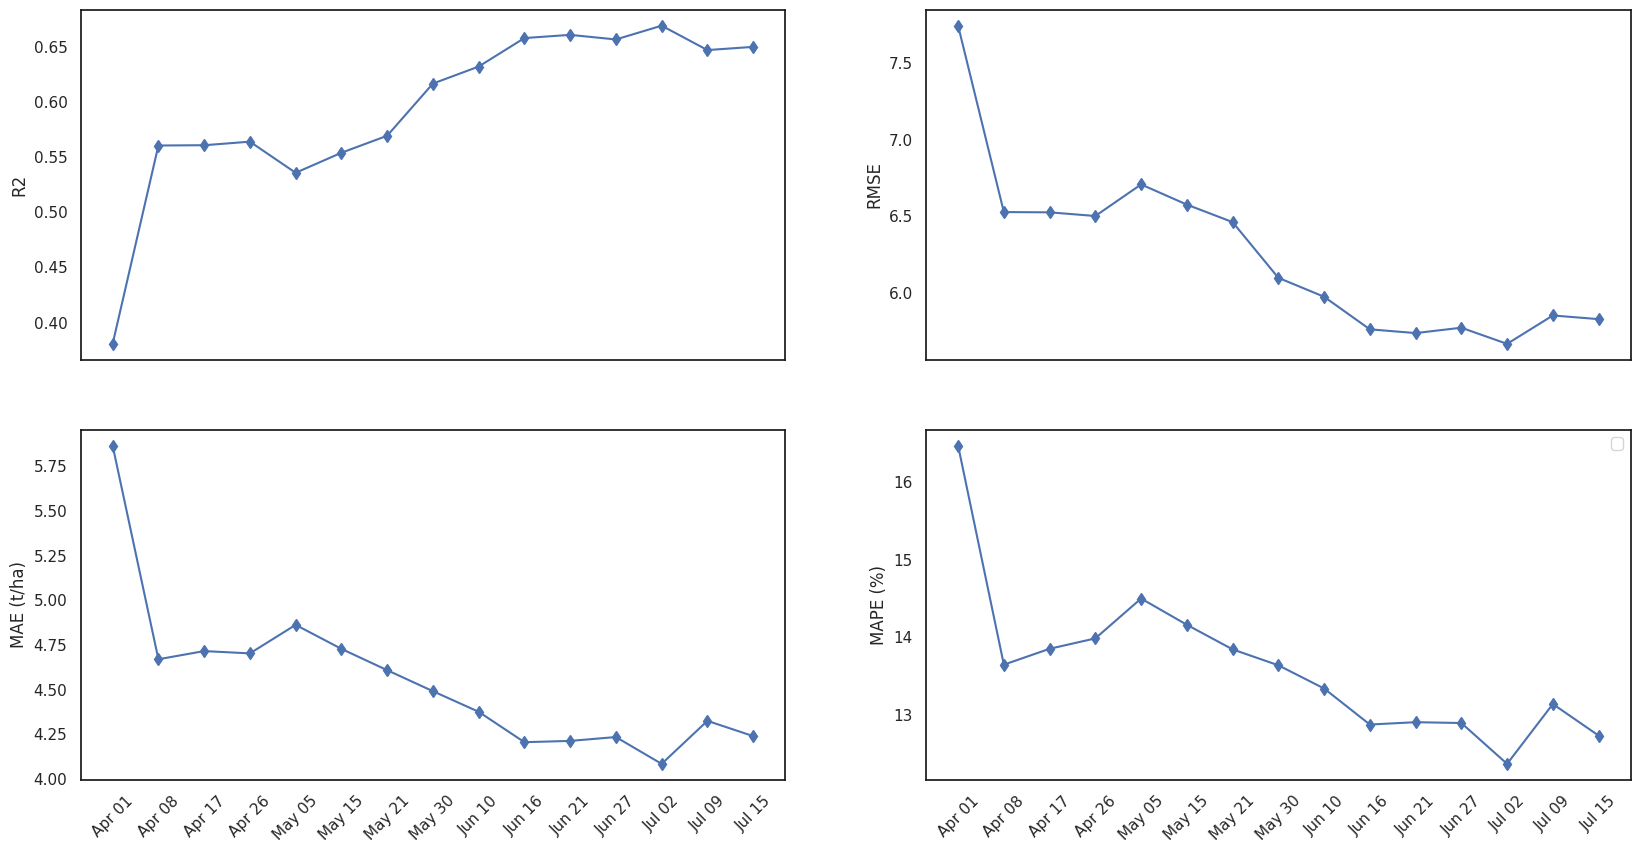

In [6]:
ff = vanilla.time_series_plot()

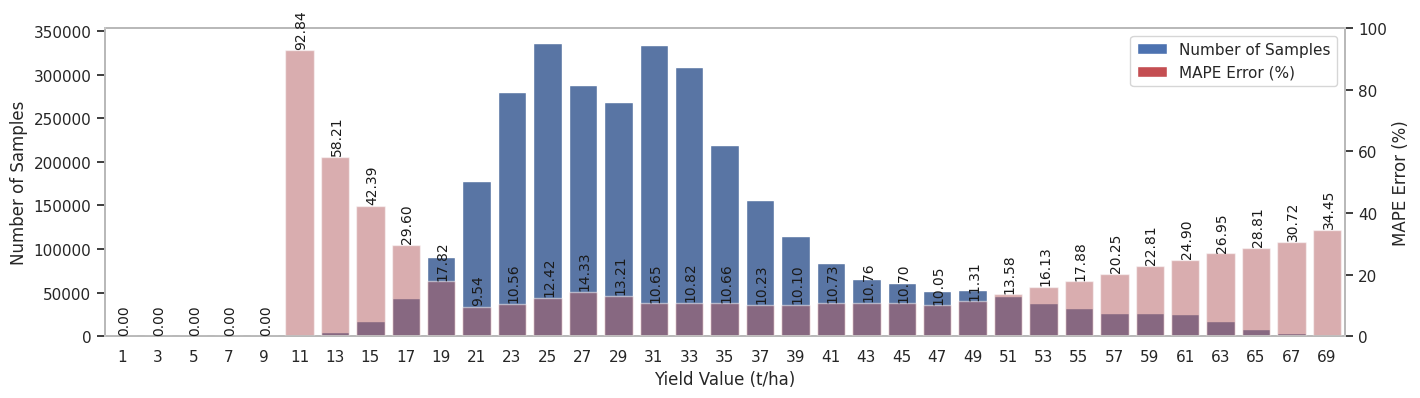

In [7]:
_ = vanilla.mape_per_bin_plot()

### Resampling 

In [8]:
exp_name = '01_lr001_wd05_resampling'
Resampling = inf.performance(exp_name)

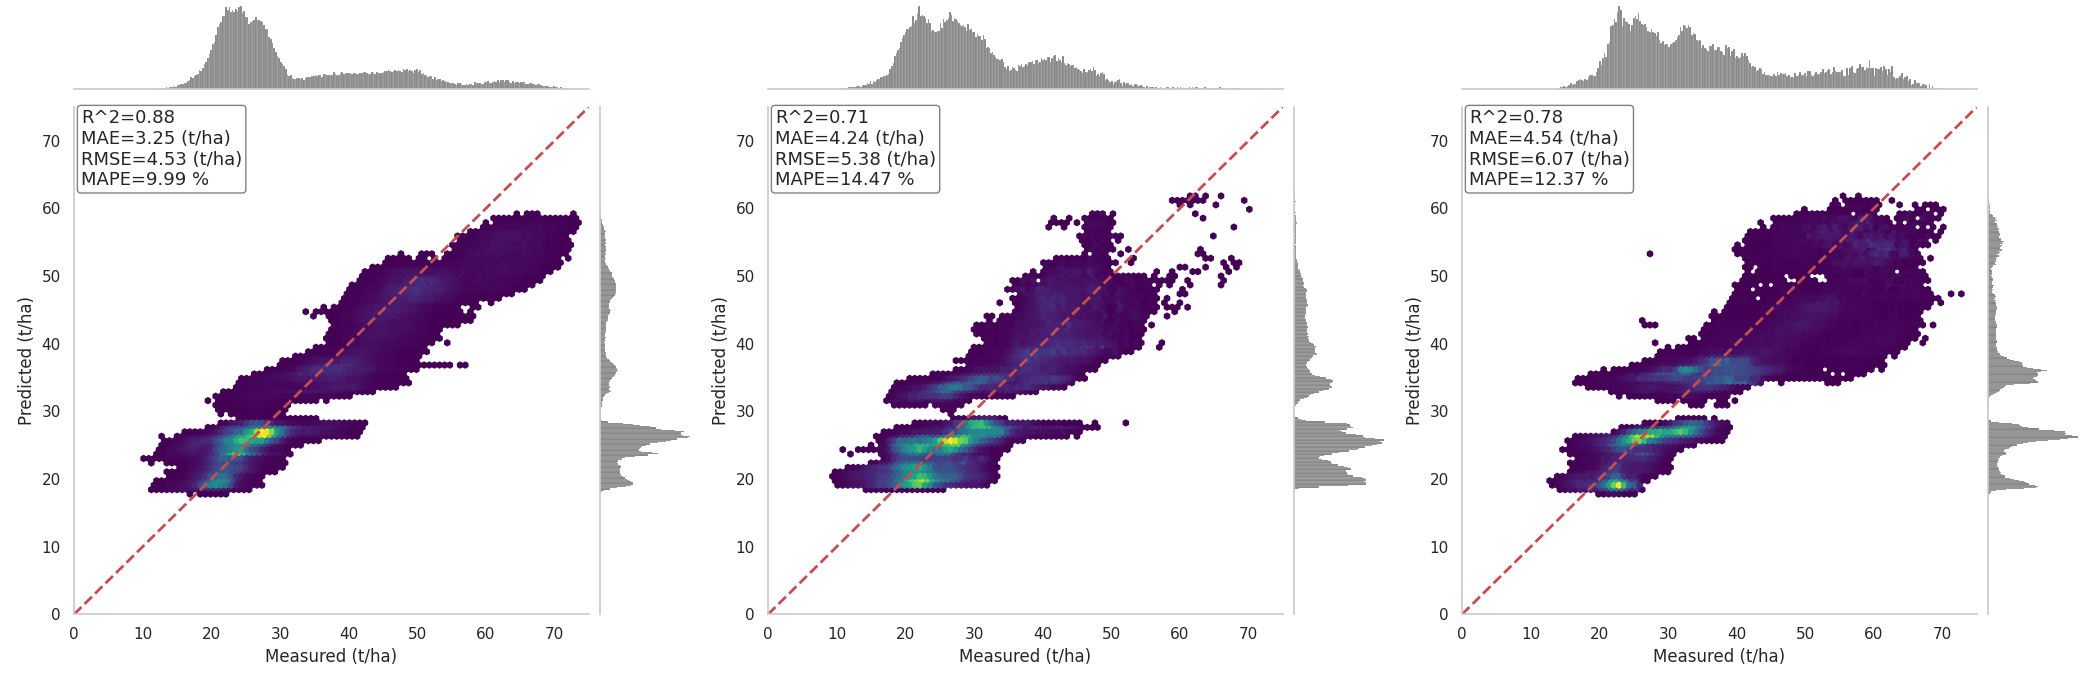

In [9]:
Resampling.scatter_plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


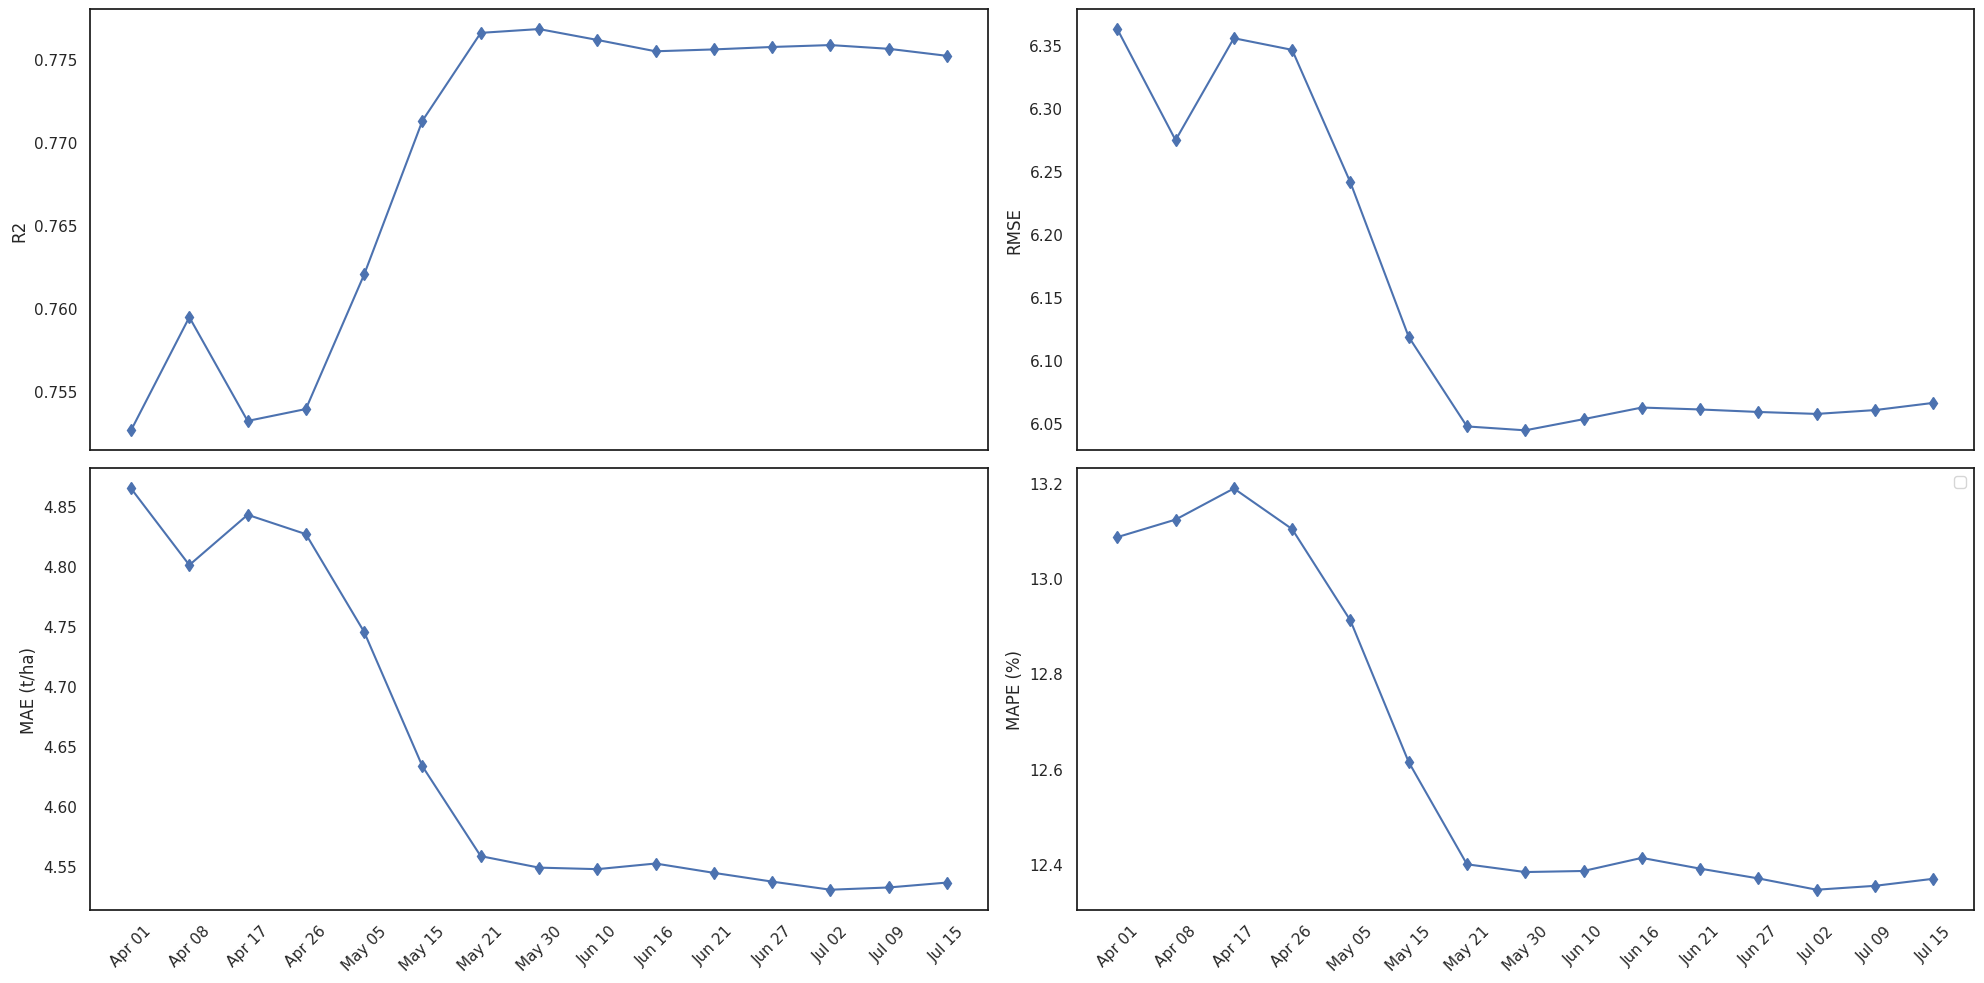

In [10]:
_ = Resampling.time_series_plot()

In [11]:
_ = Resampling.mape_per_yield_range(th1 = MIN_EXTREME_VALUE_Threshold,
                                    th2 = Max_EXTREME_VALUE_Threshold)

C1 num samples: 304476 | C2 num samples: 2446571 | C3 num samples: 434361
C1 is yield value between 0 and 22.24, C2 is yield value between 22.24 and 54.36, and C3 is yield value bigger than 54.36
All: MAE = 4.54, MAPE = 12.37 | C1: MAE = 2.97, MAPE = 15.46 | C2: MAE = 3.89, MAPE = 11.49 | C3: MAE = 9.25, MAPE = 15.13


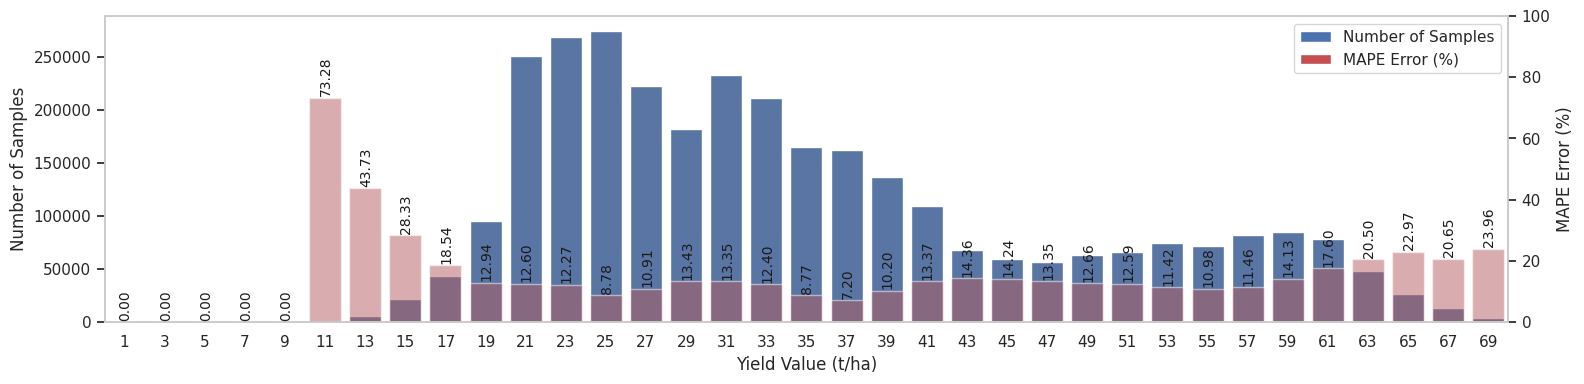

In [12]:
_ = Resampling.mape_per_bin_plot()

### Focal-R

In [13]:
exp_name = '02_lr001_wd05_drop30_focalr'
Focal_R = inf.performance(exp_name)

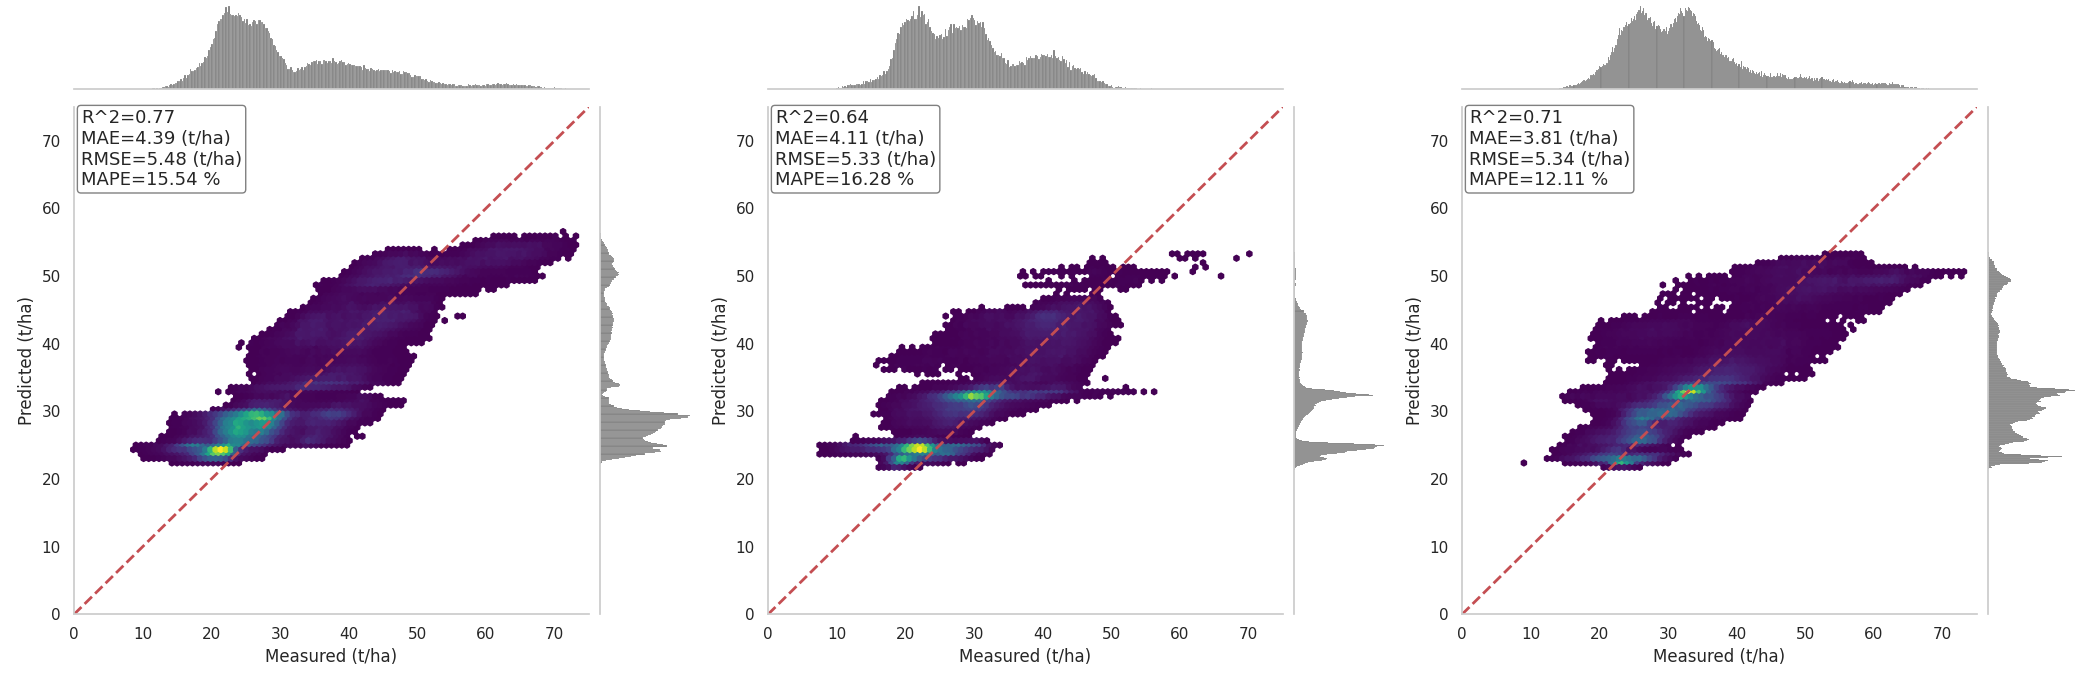

In [14]:
Focal_R.scatter_plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


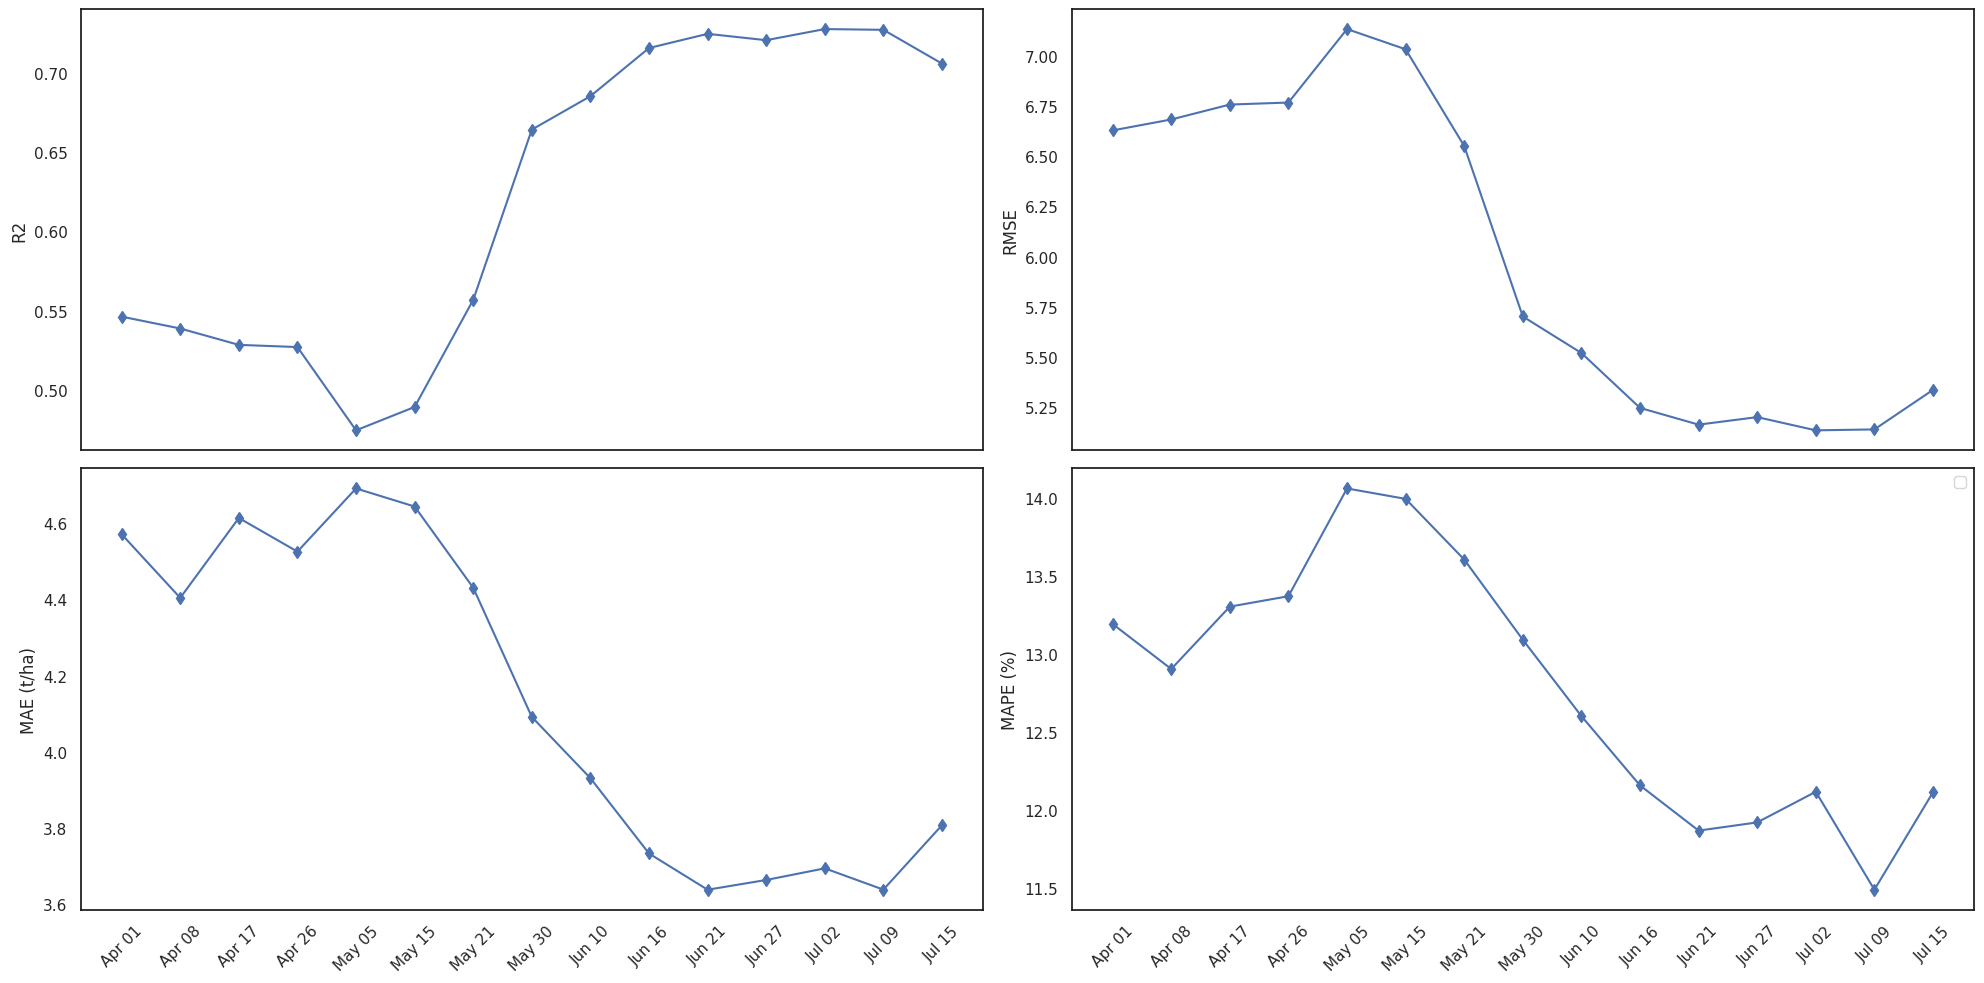

In [15]:
_ = Focal_R.time_series_plot()

In [16]:
_ = Focal_R.mape_per_yield_range(th1 = MIN_EXTREME_VALUE_Threshold,
                                    th2 = Max_EXTREME_VALUE_Threshold)

C1 num samples: 253350 | C2 num samples: 2777236 | C3 num samples: 154822
C1 is yield value between 0 and 22.24, C2 is yield value between 22.24 and 54.36, and C3 is yield value bigger than 54.36
All: MAE = 3.81, MAPE = 12.11 | C1: MAE = 5.97, MAPE = 31.60 | C2: MAE = 3.22, MAPE = 10.02 | C3: MAE = 10.80, MAPE = 17.78


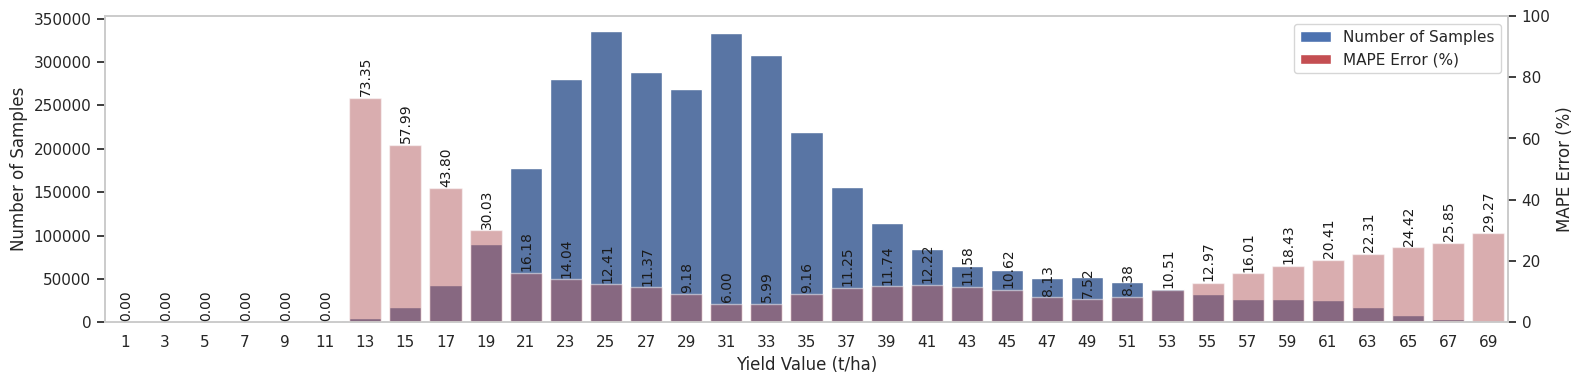

In [17]:
_ = Focal_R.mape_per_bin_plot()

### LDS

##### Weight Visualization 

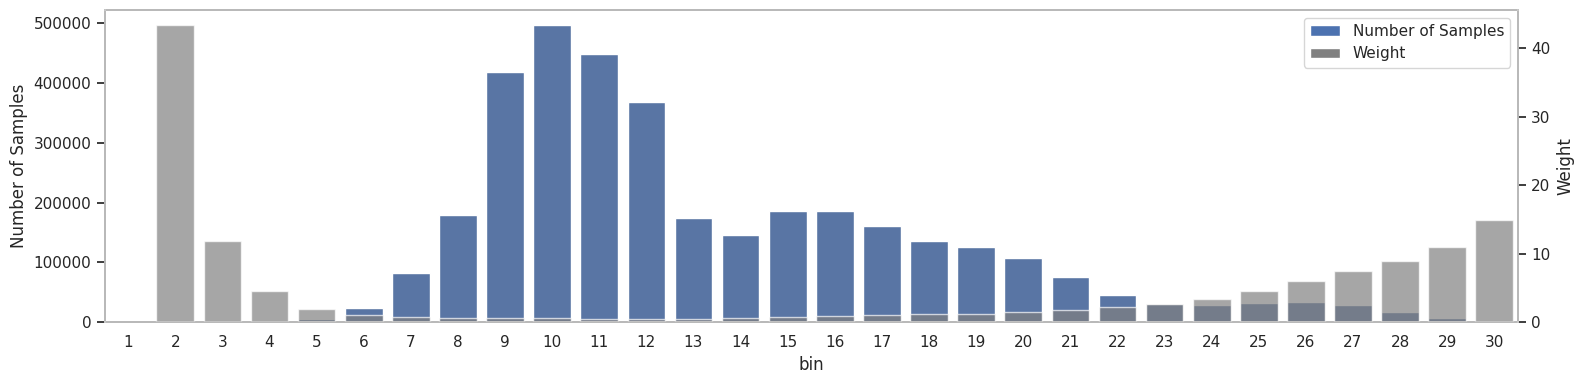

In [15]:
inf.weight_vis(method = 'lds', lds_ks= 10, lds_sigma = 8,
               ).plot()

In [18]:
exp_name = '03_lr001_wd05_LDSinv_10_8'
LDS = inf.performance(exp_name) 

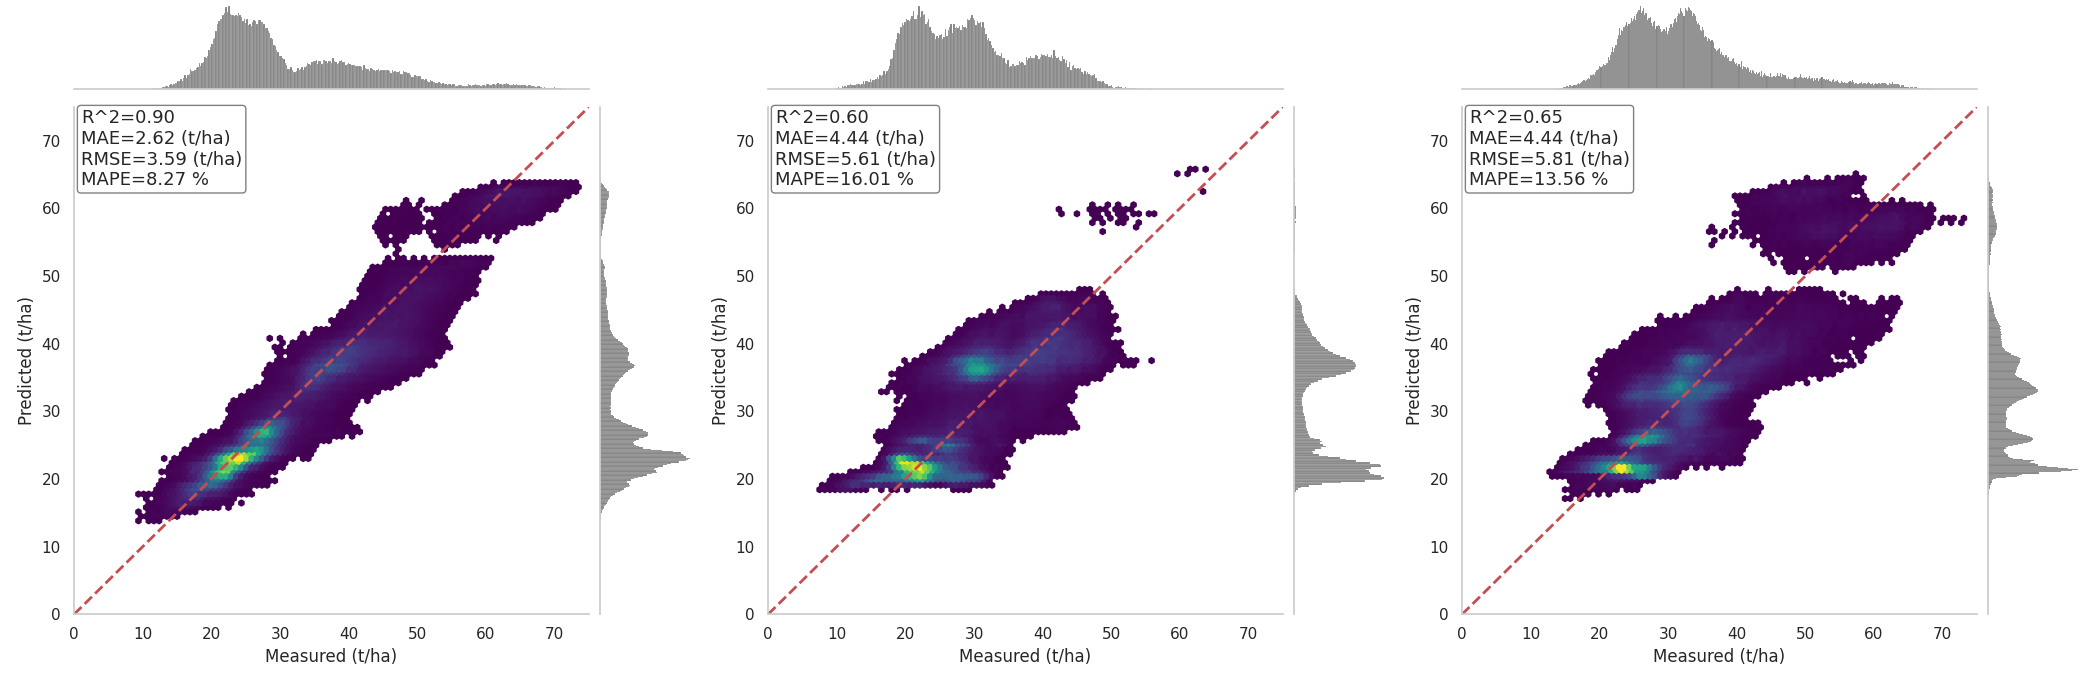

In [19]:
LDS.scatter_plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


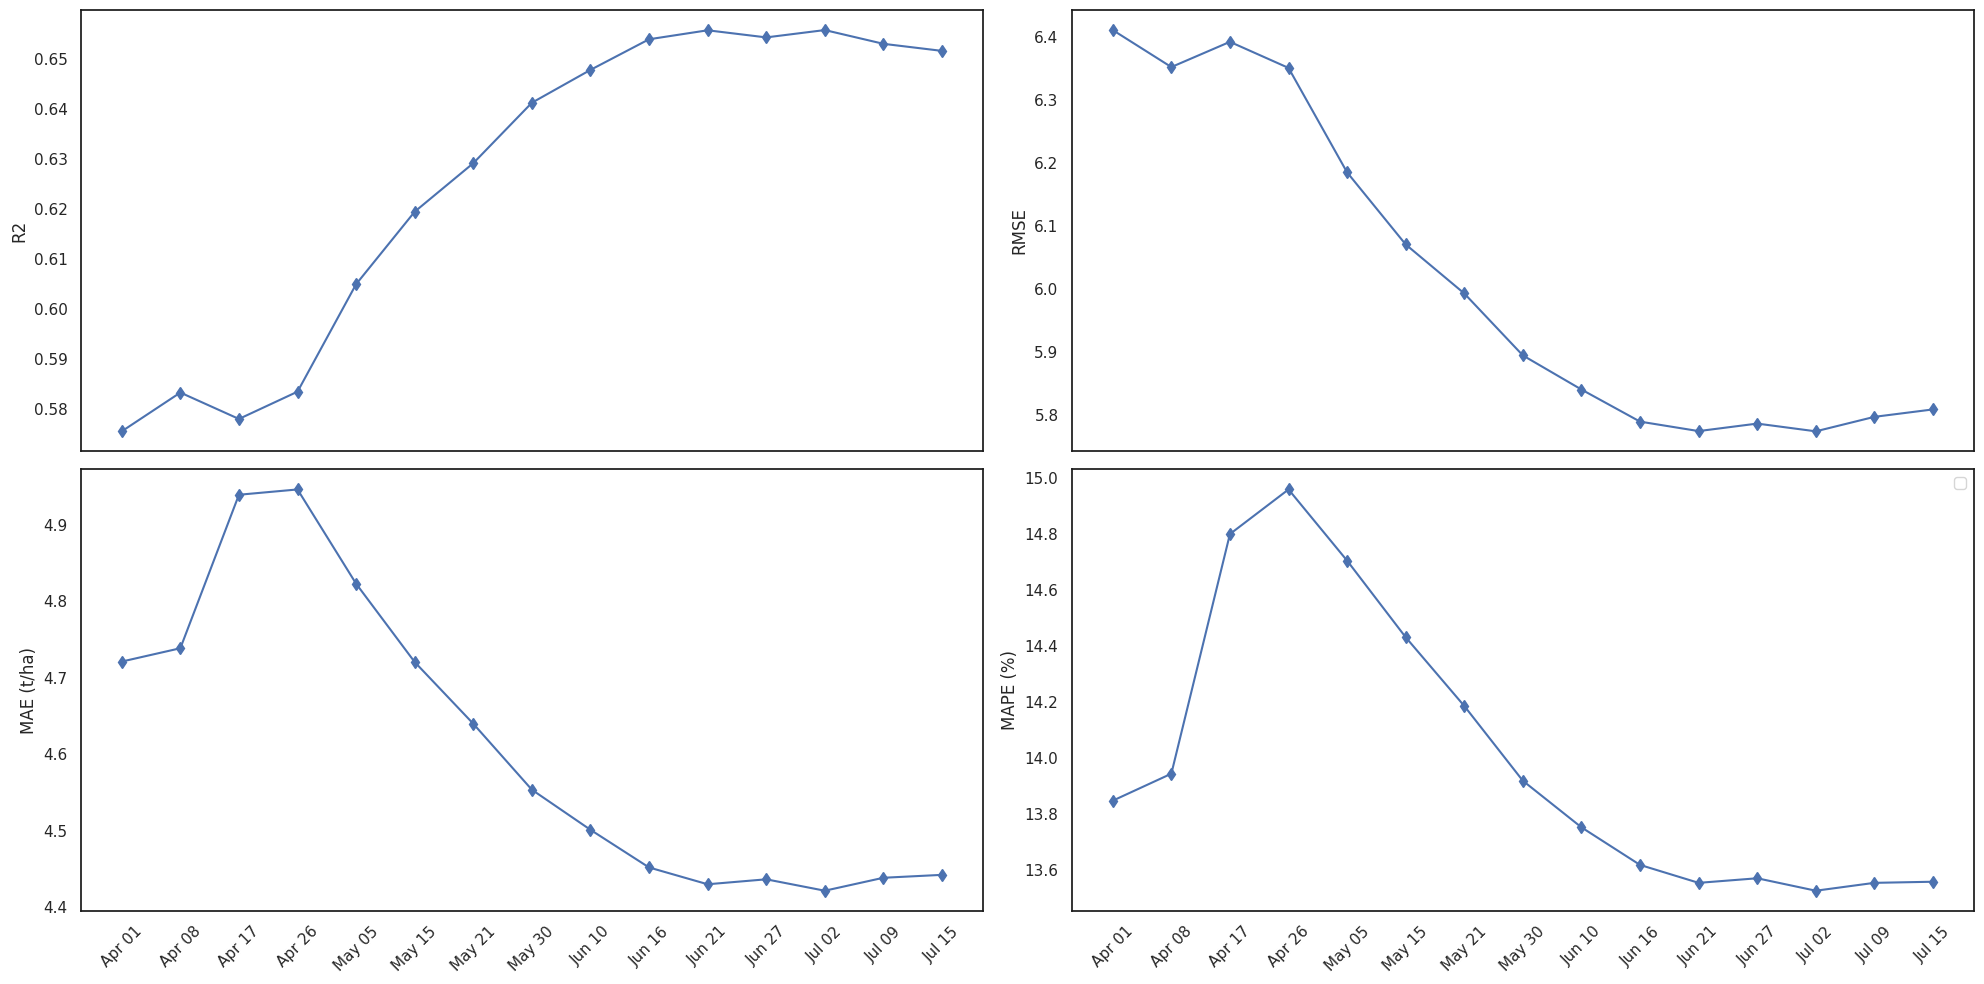

In [20]:
_ = LDS.time_series_plot()

In [21]:
_ = LDS.mape_per_yield_range(th1 = MIN_EXTREME_VALUE_Threshold, 
                             th2 = Max_EXTREME_VALUE_Threshold)

C1 num samples: 253350 | C2 num samples: 2777236 | C3 num samples: 154822
C1 is yield value between 0 and 22.24, C2 is yield value between 22.24 and 54.36, and C3 is yield value bigger than 54.36
All: MAE = 4.44, MAPE = 13.56 | C1: MAE = 2.97, MAPE = 16.08 | C2: MAE = 4.44, MAPE = 13.44 | C3: MAE = 6.95, MAPE = 11.57


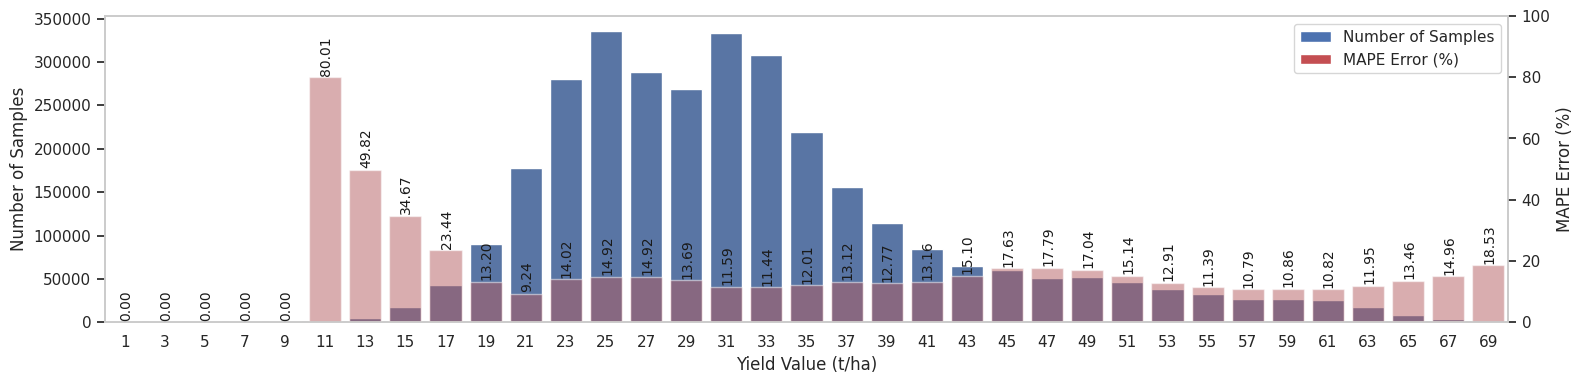

In [22]:
_ = LDS.mape_per_bin_plot()

### DW

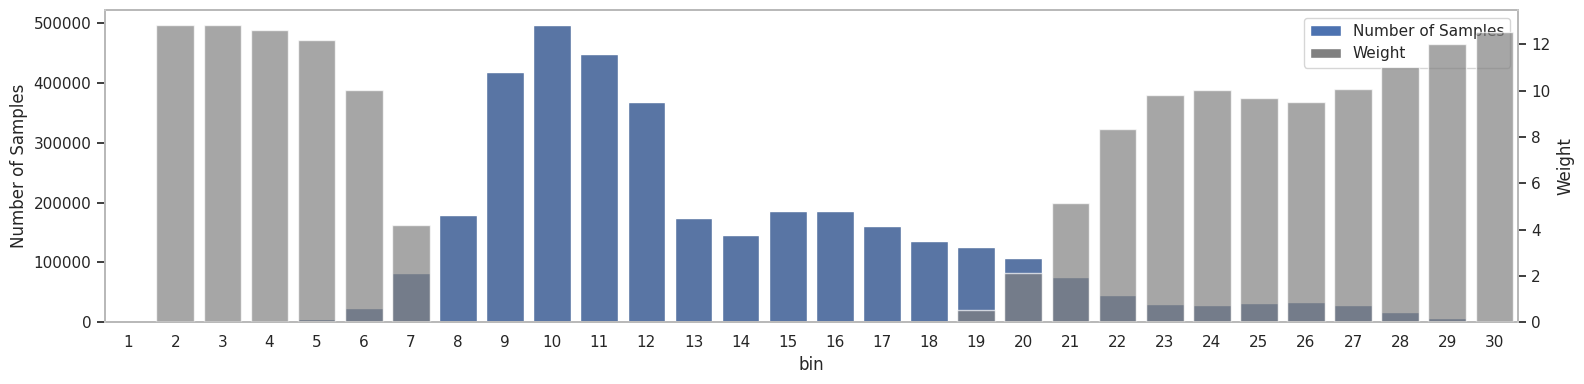

In [42]:
inf.weight_vis(method = 'dw', dw_alpha = 3.9,).plot()

In [23]:
exp_name = '04_lr001_wd05_DW_3.9'
DW = inf.performance(exp_name)

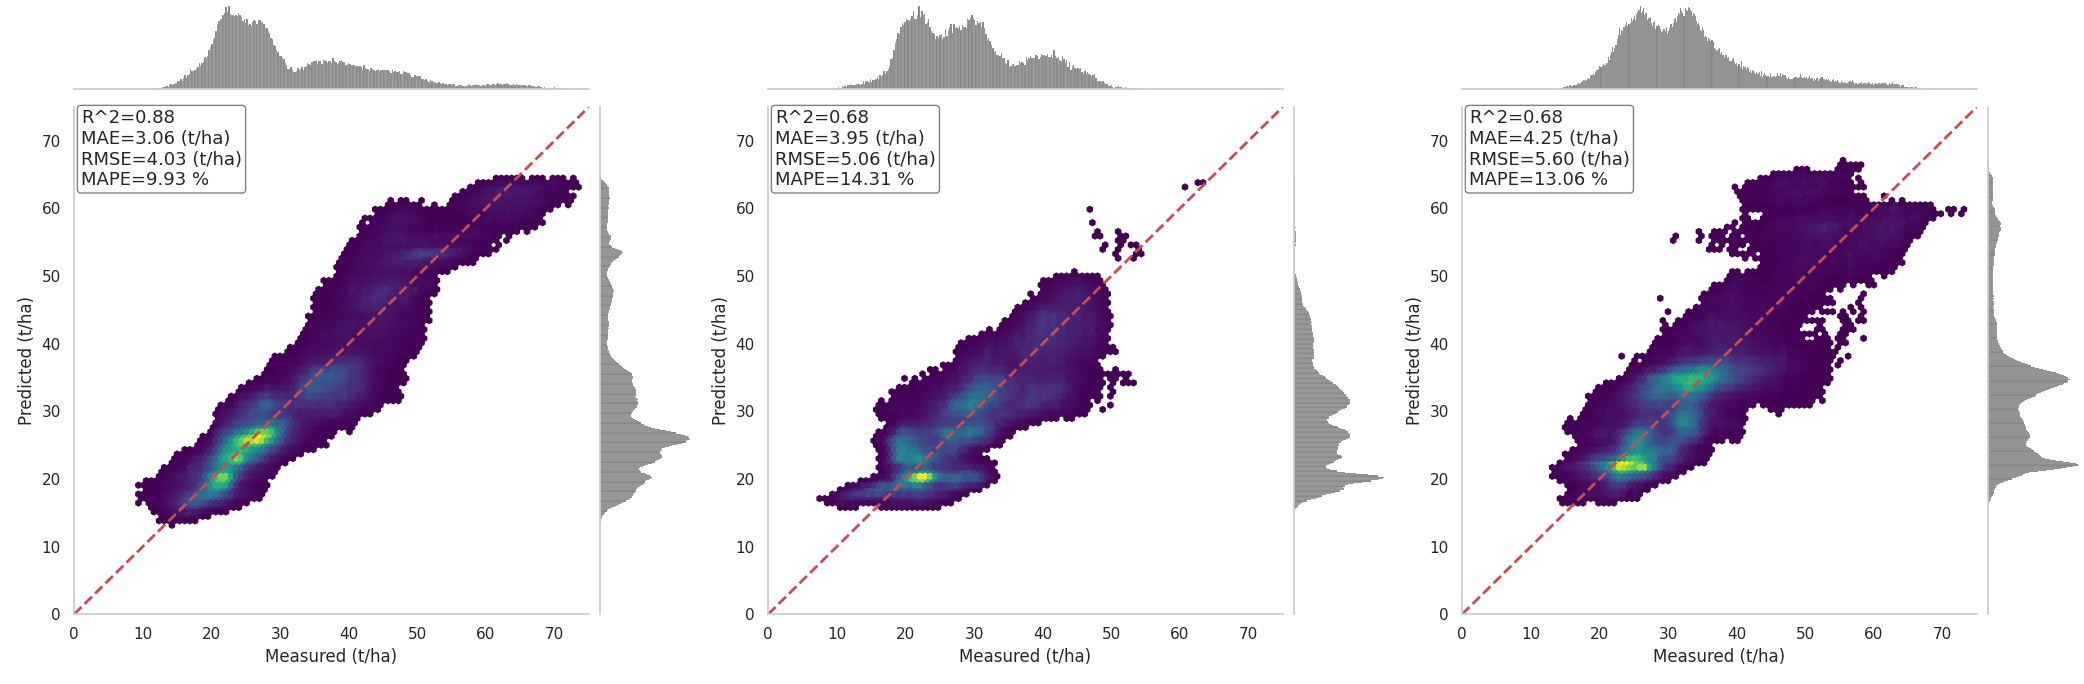

In [24]:
DW.scatter_plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


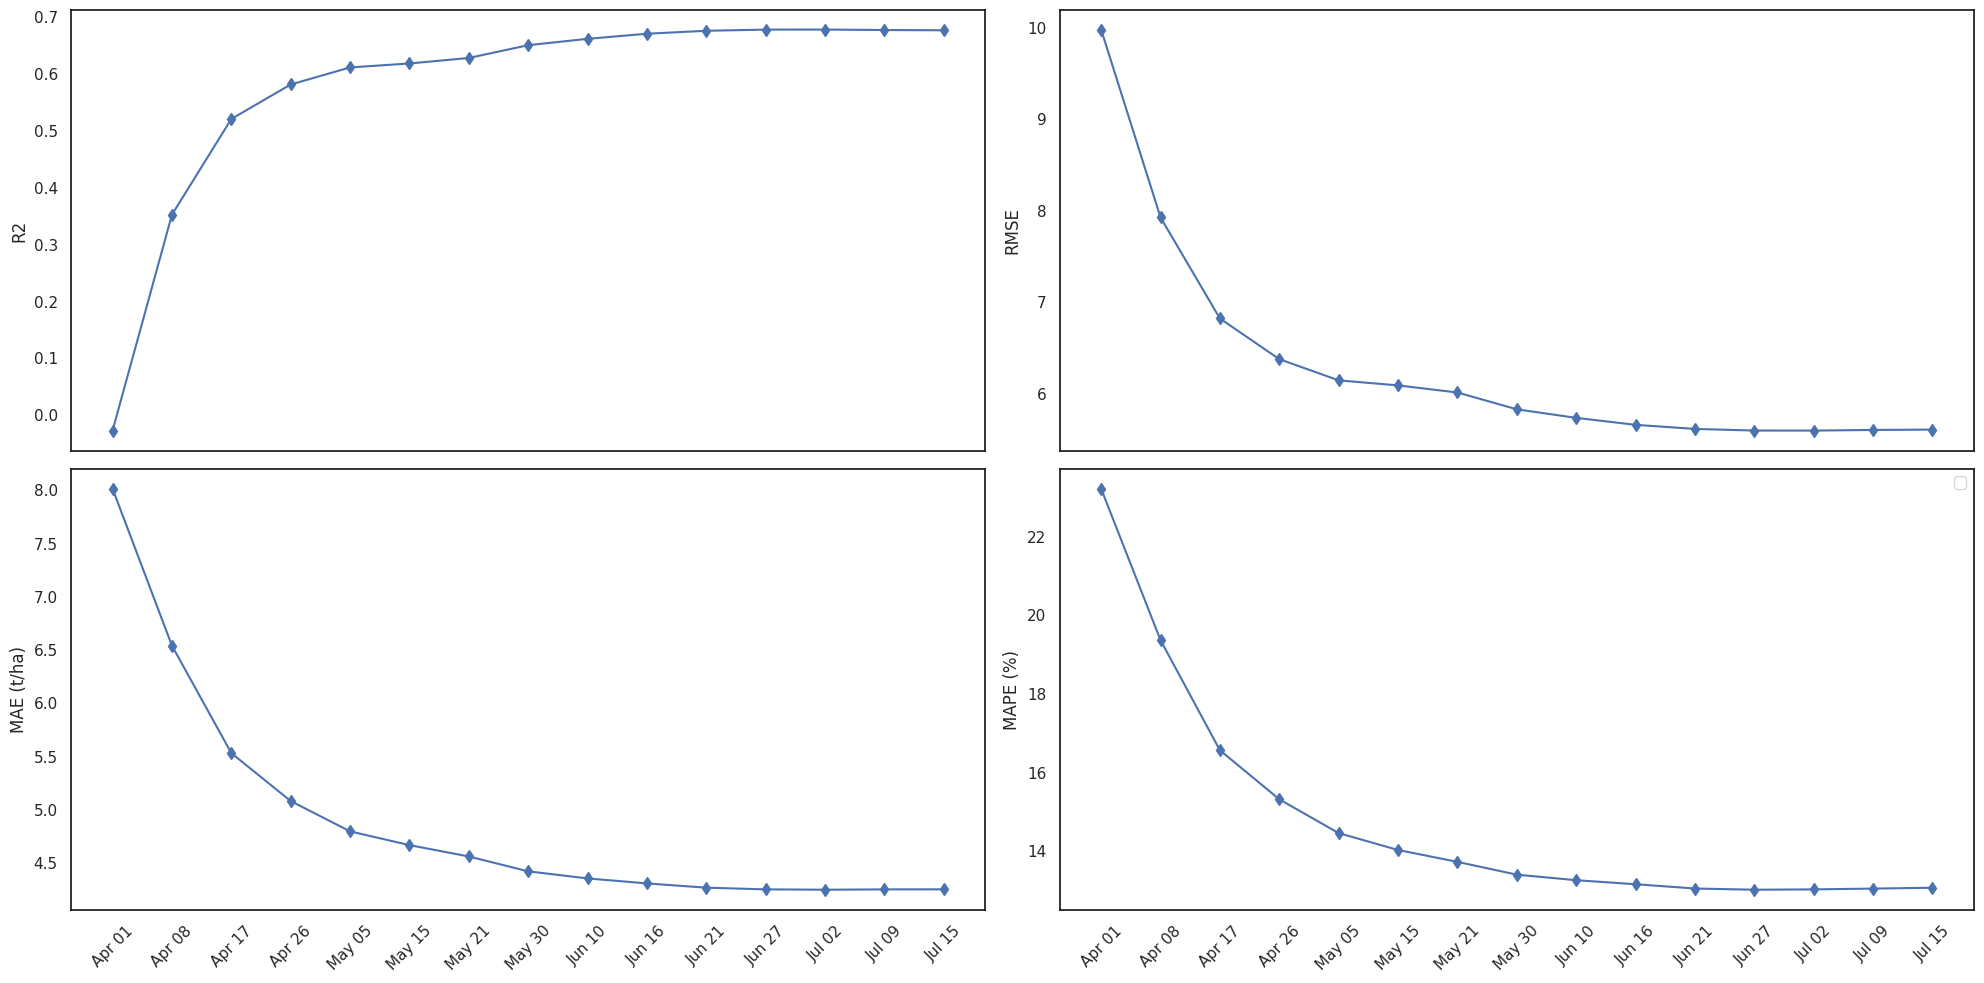

In [25]:
_ = DW.time_series_plot()

In [26]:
_ = DW.mape_per_yield_range(th1 = MIN_EXTREME_VALUE_Threshold, 
                            th2 = Max_EXTREME_VALUE_Threshold)

C1 num samples: 253350 | C2 num samples: 2777236 | C3 num samples: 154822
C1 is yield value between 0 and 22.24, C2 is yield value between 22.24 and 54.36, and C3 is yield value bigger than 54.36
All: MAE = 4.25, MAPE = 13.06 | C1: MAE = 3.50, MAPE = 18.73 | C2: MAE = 4.21, MAPE = 12.70 | C3: MAE = 6.20, MAPE = 10.31


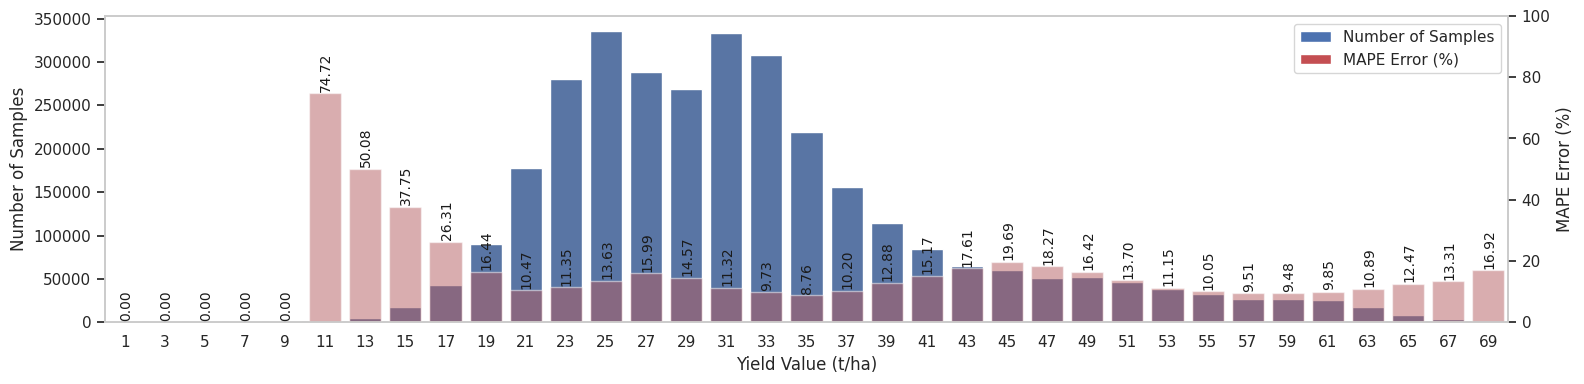

In [27]:
_ = DW.mape_per_bin_plot()

### CB

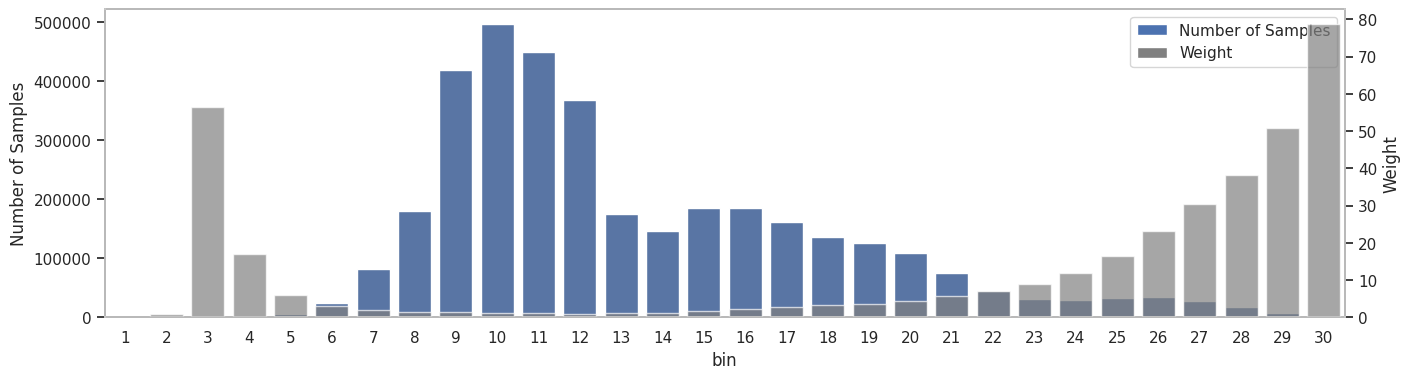

In [5]:
inf.weight_vis(method = 'cb', lds_ks = 10, lds_sigma = 8, betha = 3).plot()

In [28]:
exp_name = '05_lr001_wd05_CB_3'
CB = inf.performance(exp_name)

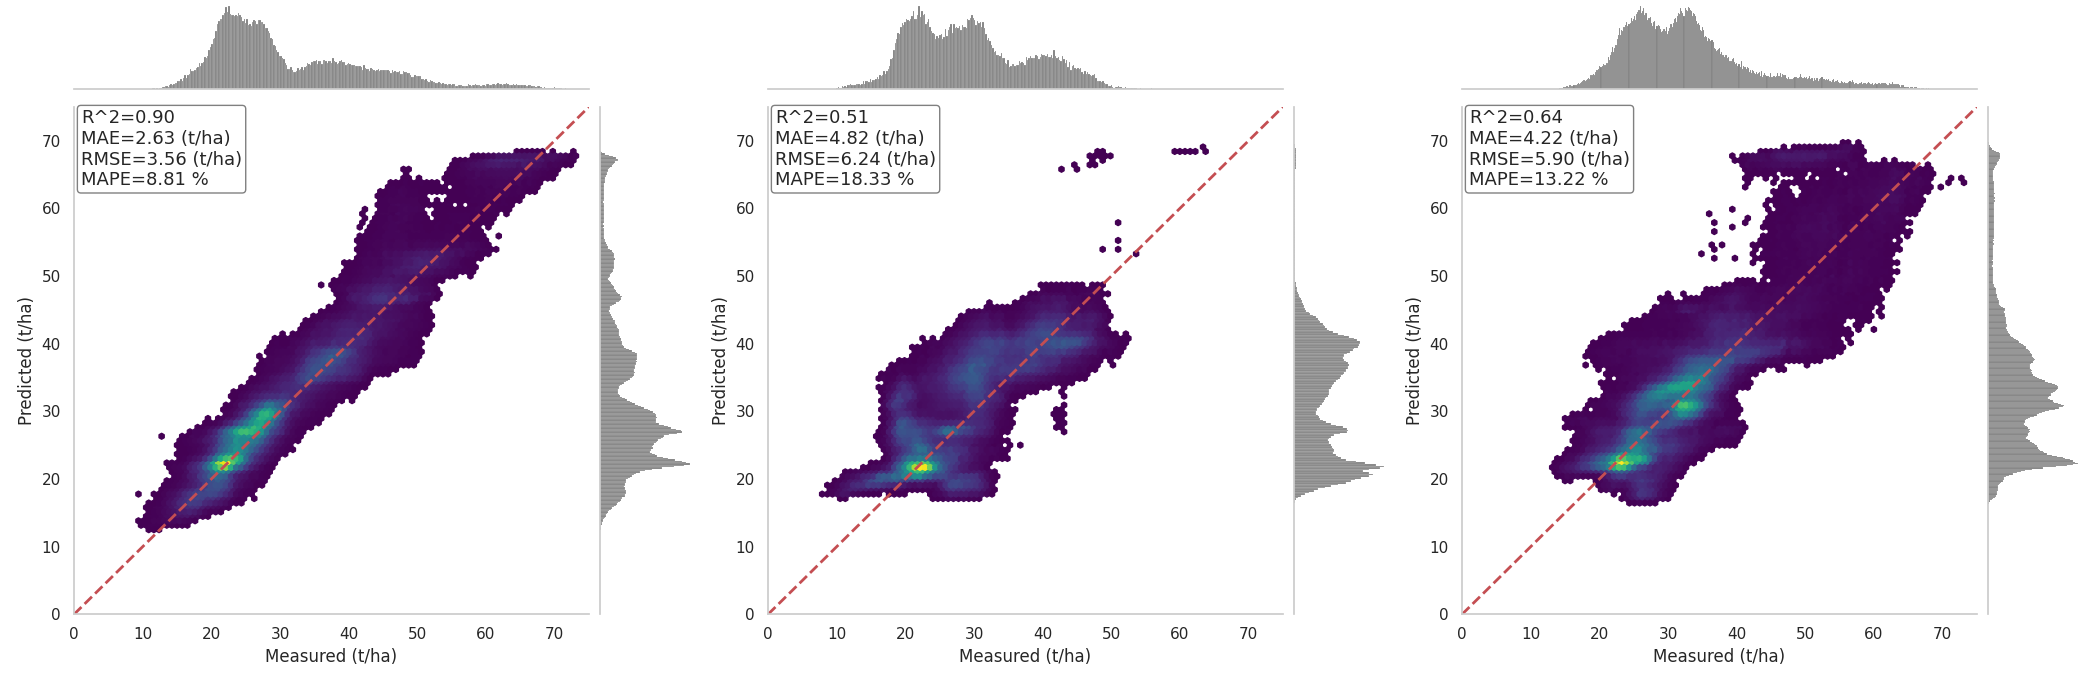

In [29]:
CB.scatter_plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


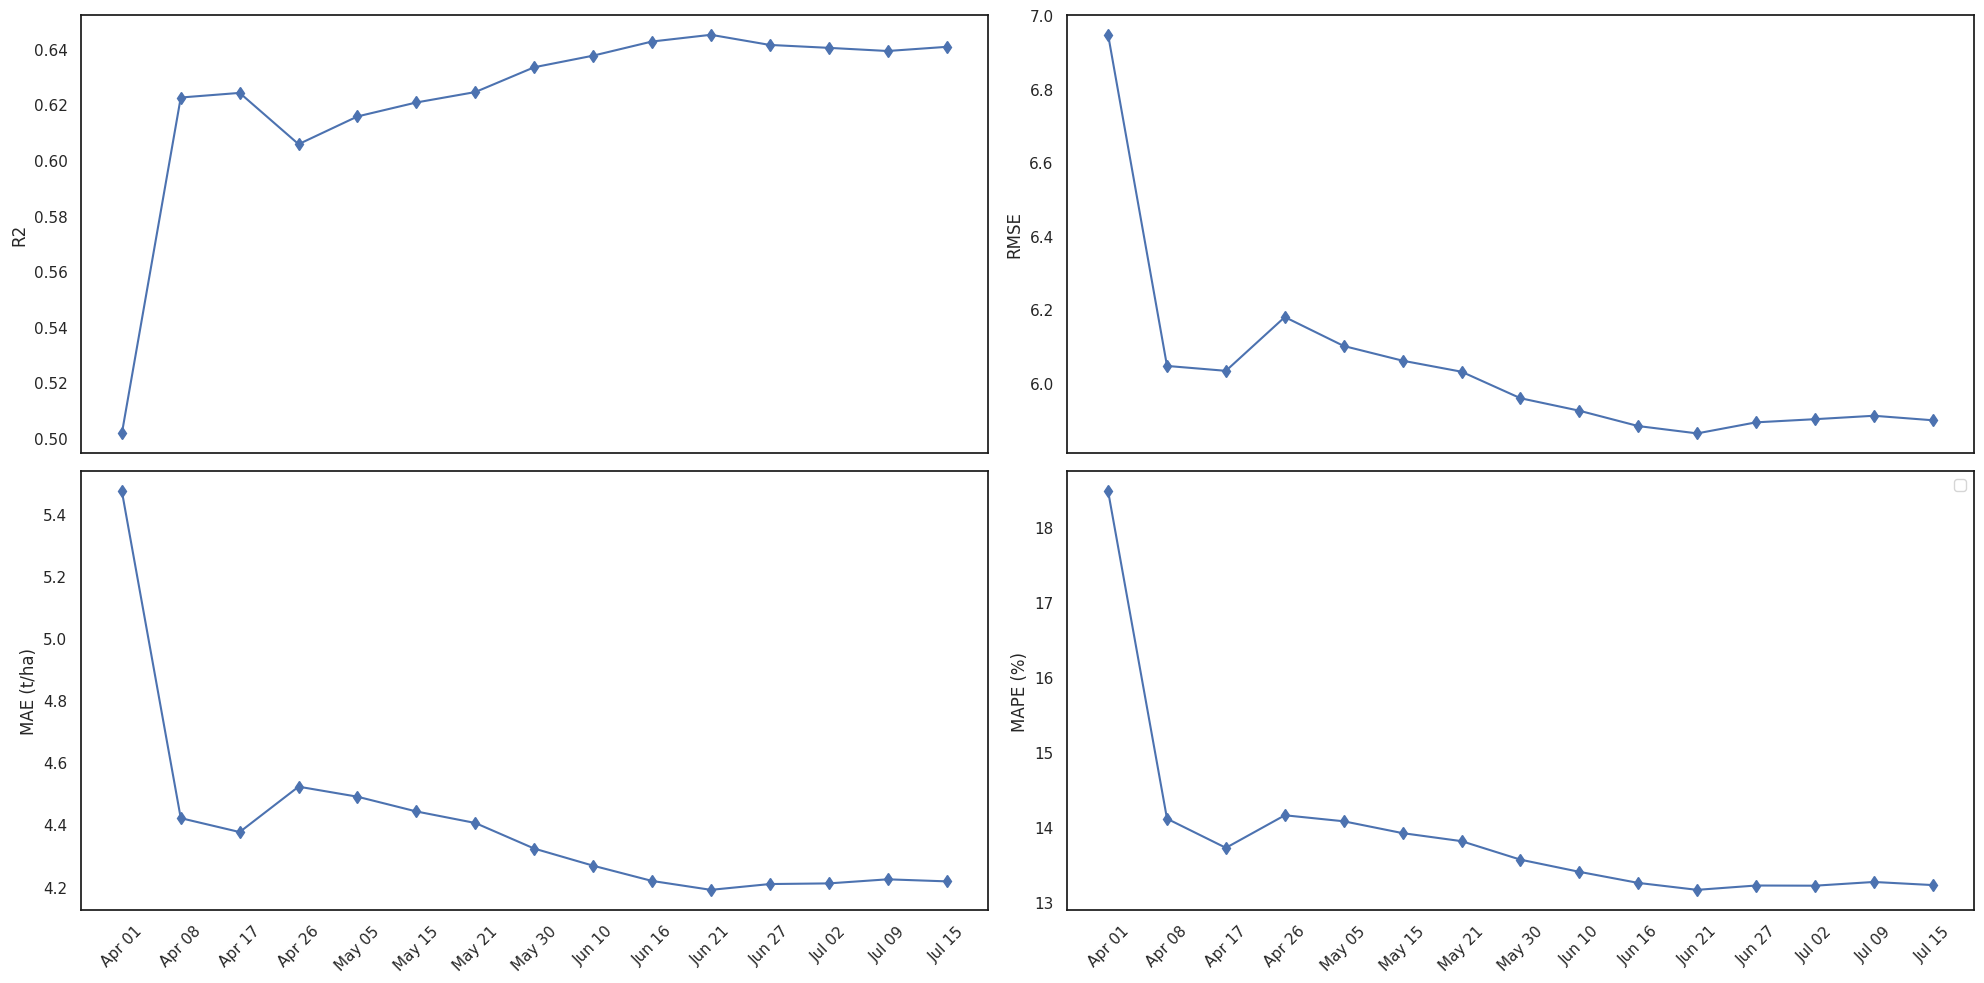

In [30]:
_ = CB.time_series_plot()

In [31]:
_ = CB.mape_per_yield_range(th1 = MIN_EXTREME_VALUE_Threshold, 
                            th2 = Max_EXTREME_VALUE_Threshold)

C1 num samples: 253350 | C2 num samples: 2777236 | C3 num samples: 154822
C1 is yield value between 0 and 22.24, C2 is yield value between 22.24 and 54.36, and C3 is yield value bigger than 54.36
All: MAE = 4.22, MAPE = 13.22 | C1: MAE = 4.45, MAPE = 23.72 | C2: MAE = 4.10, MAPE = 12.44 | C3: MAE = 5.92, MAPE = 10.05


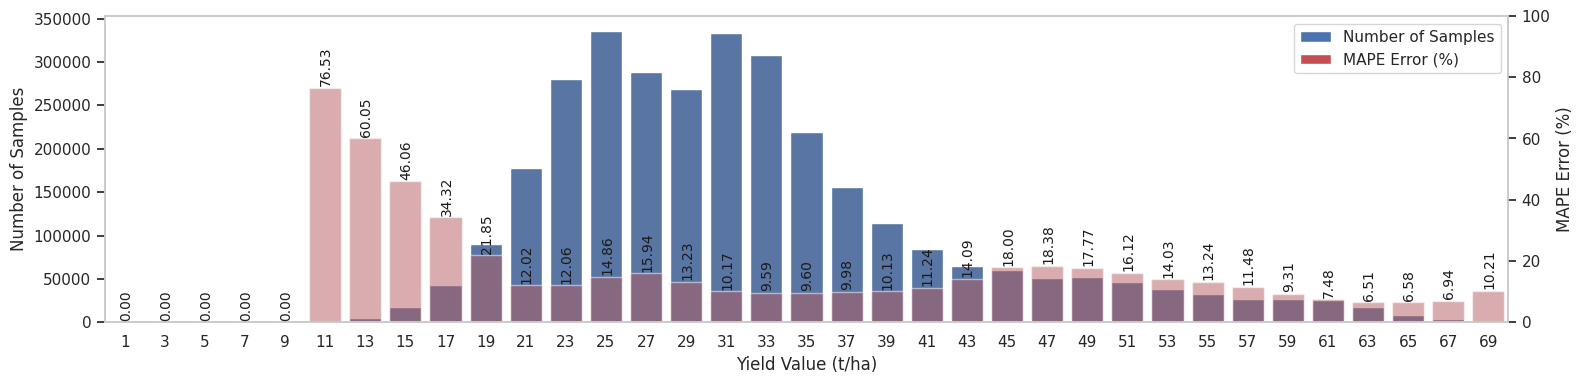

In [32]:
_ = CB.mape_per_bin_plot()

### ExtremeWeight (ours)

In [38]:
exp_name = '06_lr001_wd05_ExW'
ew = inf.performance(exp_name)

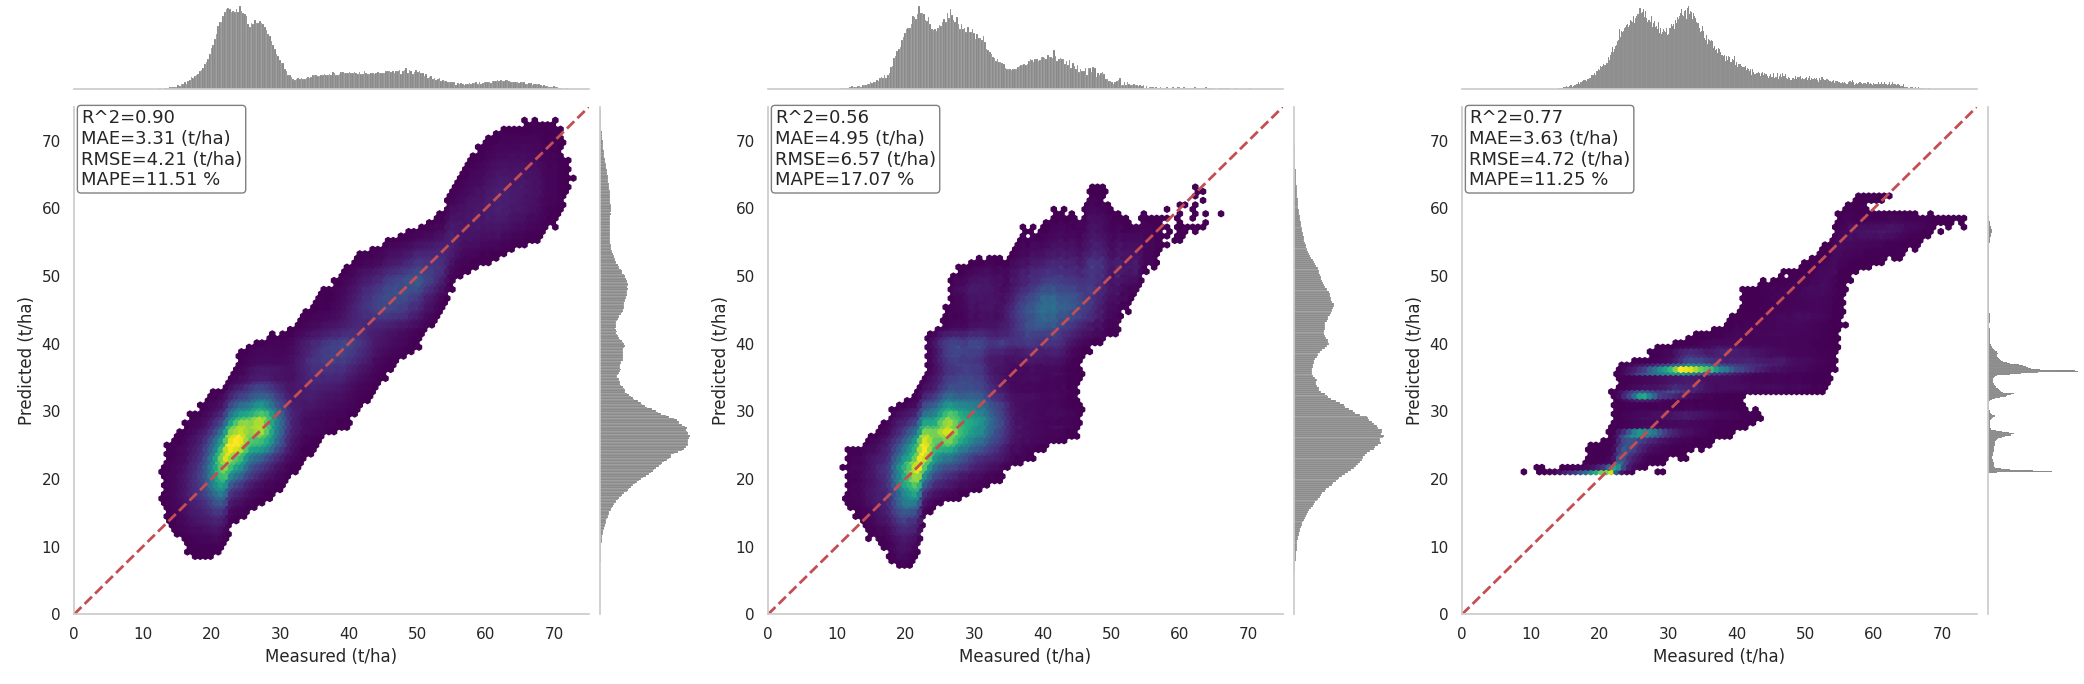

In [39]:
ew.scatter_plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


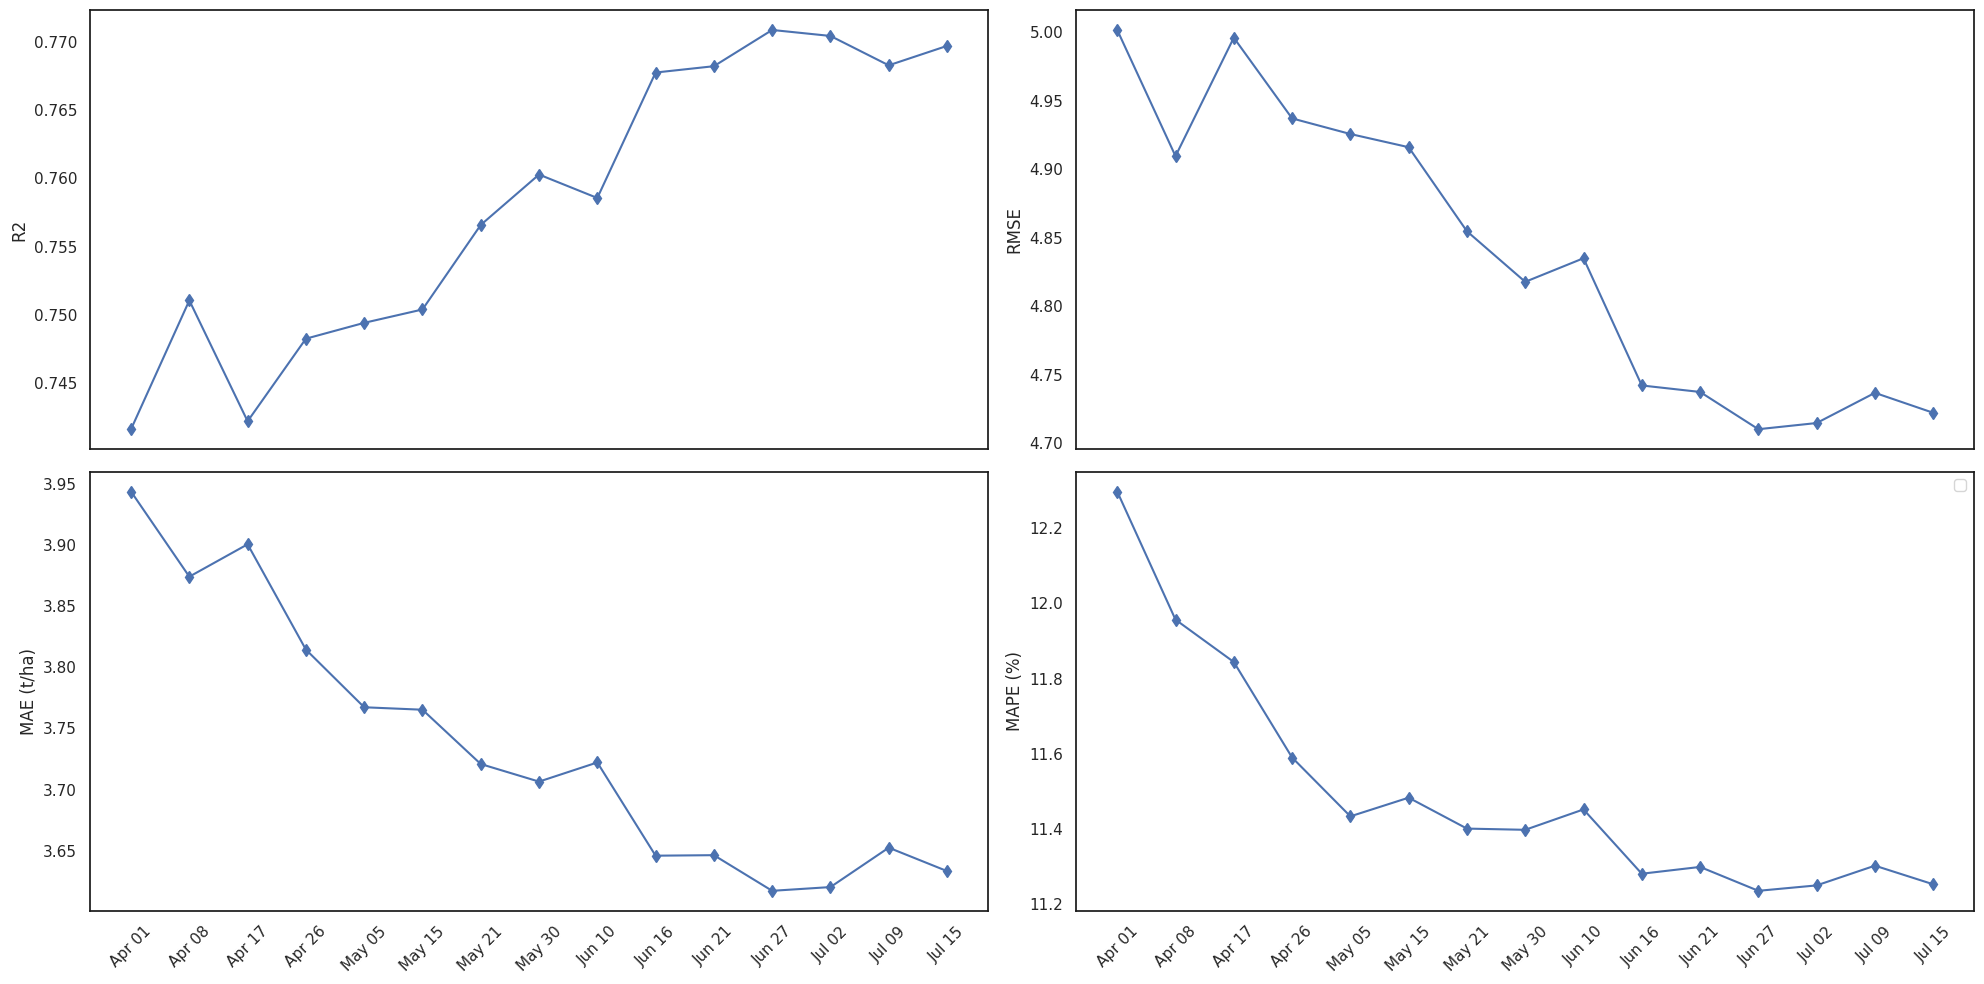

weeks   R2_mean  MAE_mean  RMSE_mean  MAPE_mean
0   Apr 01  0.741643  3.943657   5.001796  12.297437
1   Apr 08  0.751071  3.874089   4.909689  11.956927
2   Apr 17  0.742226  3.900562   4.996156  11.844385
3   Apr 26  0.748269  3.814472   4.937241  11.590480
4   May 05  0.749429  3.767320   4.925853  11.434065
5   May 15  0.750408  3.765309   4.916226  11.483708
6   May 21  0.756598  3.720902   4.854880  11.401525
7   May 30  0.760285  3.706532   4.817967  11.398272
8   Jun 10  0.758569  3.722195   4.835177  11.452467
9   Jun 16  0.767753  3.645976   4.742323  11.281538
10  Jun 21  0.768216  3.646394   4.737592  11.299599
11  Jun 27  0.770869  3.617256   4.710400  11.236109
12  Jul 02  0.770431  3.620314   4.714898  11.250510
13  Jul 09  0.768281  3.652519   4.736932  11.302947
14  Jul 15  0.769702  3.633392   4.722383  11.253482

In [40]:
ew.time_series_plot()

In [41]:
_ = ew.mape_per_yield_range(th1 = MIN_EXTREME_VALUE_Threshold, 
                            th2 = Max_EXTREME_VALUE_Threshold)

C1 num samples: 506700 | C2 num samples: 5554472 | C3 num samples: 309644
C1 is yield value between 0 and 22.24, C2 is yield value between 22.24 and 54.36, and C3 is yield value bigger than 54.36
All: MAE = 3.63, MAPE = 11.25 | C1: MAE = 1.73, MAPE = 9.96 | C2: MAE = 3.76, MAPE = 11.60 | C3: MAE = 4.40, MAPE = 7.14


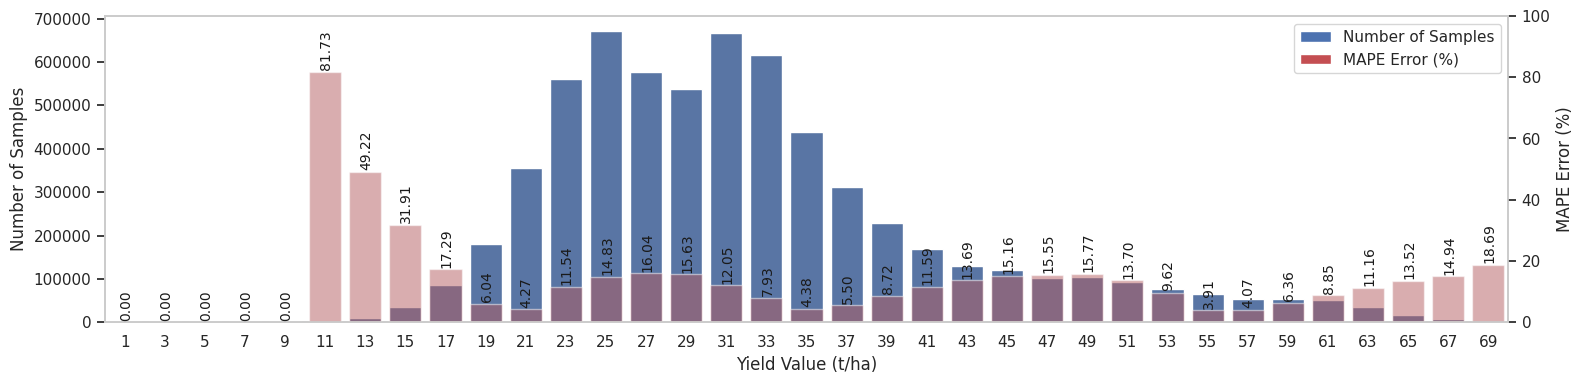

In [42]:
_ = ew.mape_per_bin_plot()

### YieldZone

In [43]:
exp_name = '07_lr001_wd05_drop30_yz'
yz = inf.performance(exp_name)

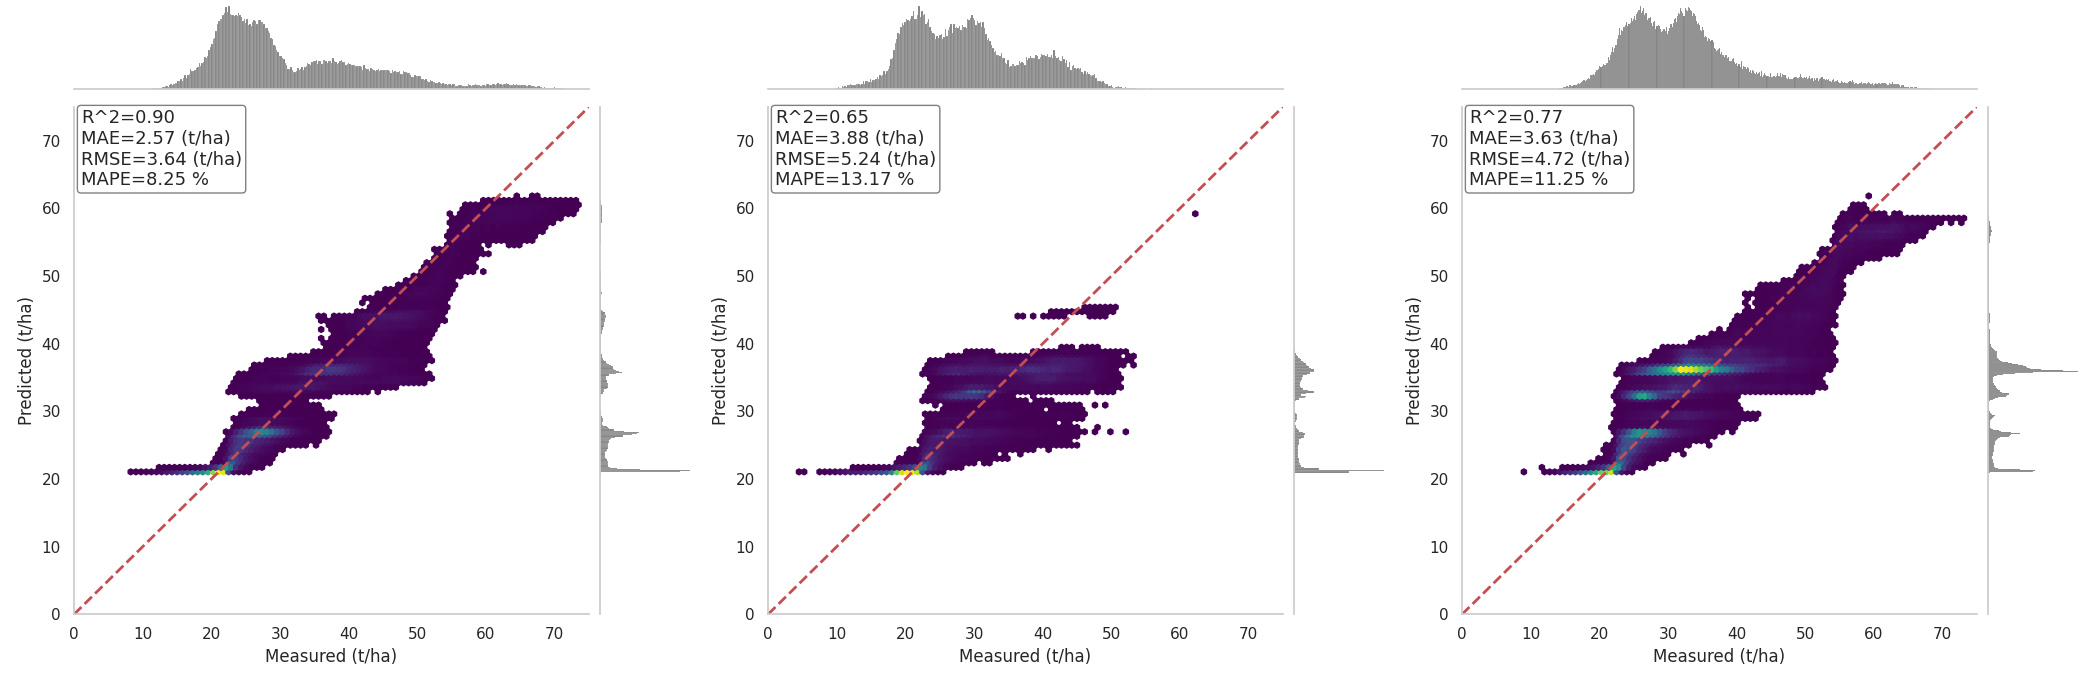

In [44]:
yz.scatter_plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


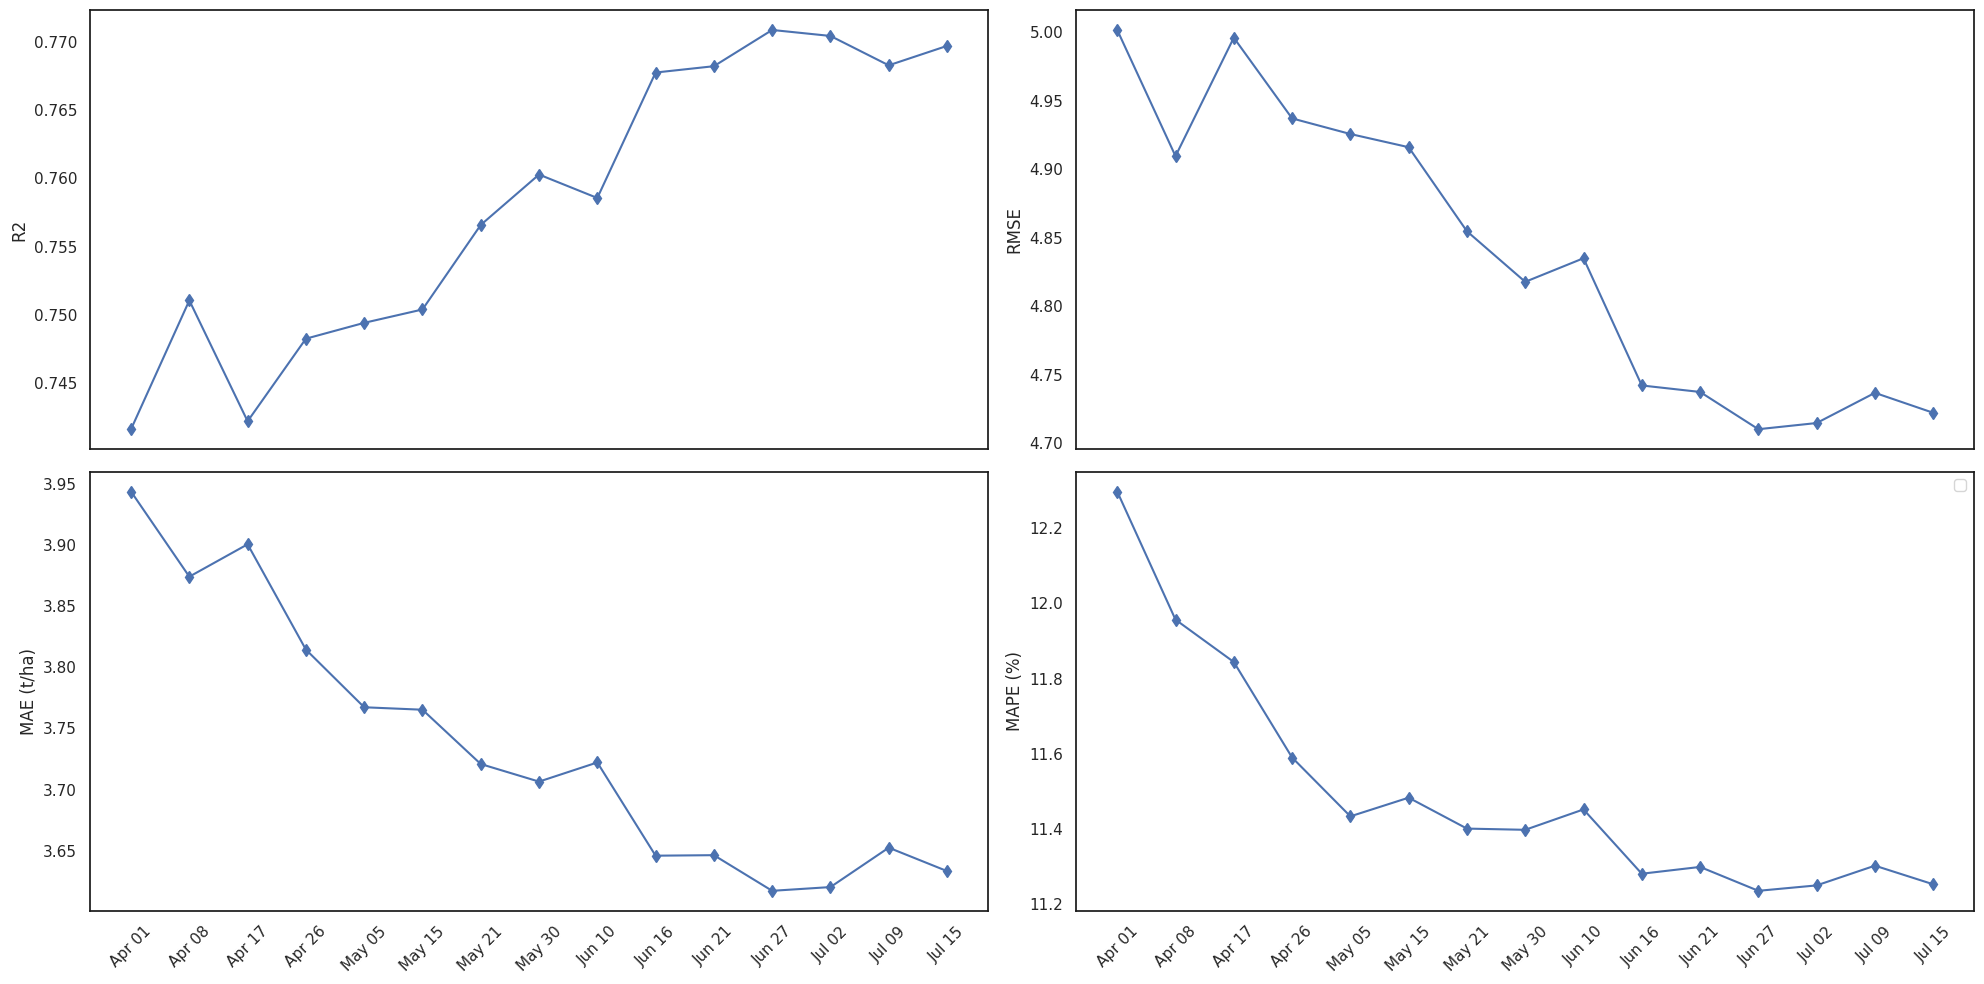

weeks   R2_mean  MAE_mean  RMSE_mean  MAPE_mean
0   Apr 01  0.741643  3.943657   5.001796  12.297437
1   Apr 08  0.751071  3.874089   4.909689  11.956927
2   Apr 17  0.742226  3.900562   4.996156  11.844385
3   Apr 26  0.748269  3.814472   4.937241  11.590480
4   May 05  0.749429  3.767320   4.925853  11.434065
5   May 15  0.750408  3.765309   4.916226  11.483708
6   May 21  0.756598  3.720902   4.854880  11.401525
7   May 30  0.760285  3.706532   4.817967  11.398272
8   Jun 10  0.758569  3.722195   4.835177  11.452467
9   Jun 16  0.767753  3.645976   4.742323  11.281538
10  Jun 21  0.768216  3.646394   4.737592  11.299599
11  Jun 27  0.770869  3.617256   4.710400  11.236109
12  Jul 02  0.770431  3.620314   4.714898  11.250510
13  Jul 09  0.768281  3.652519   4.736932  11.302947
14  Jul 15  0.769702  3.633392   4.722383  11.253482

In [45]:
yz.time_series_plot()

In [46]:
_ = yz.mape_per_yield_range(th1 = MIN_EXTREME_VALUE_Threshold, 
                            th2 = Max_EXTREME_VALUE_Threshold)

C1 num samples: 253350 | C2 num samples: 2777236 | C3 num samples: 154822
C1 is yield value between 0 and 22.24, C2 is yield value between 22.24 and 54.36, and C3 is yield value bigger than 54.36
All: MAE = 3.63, MAPE = 11.25 | C1: MAE = 1.73, MAPE = 9.96 | C2: MAE = 3.76, MAPE = 11.60 | C3: MAE = 4.40, MAPE = 7.14


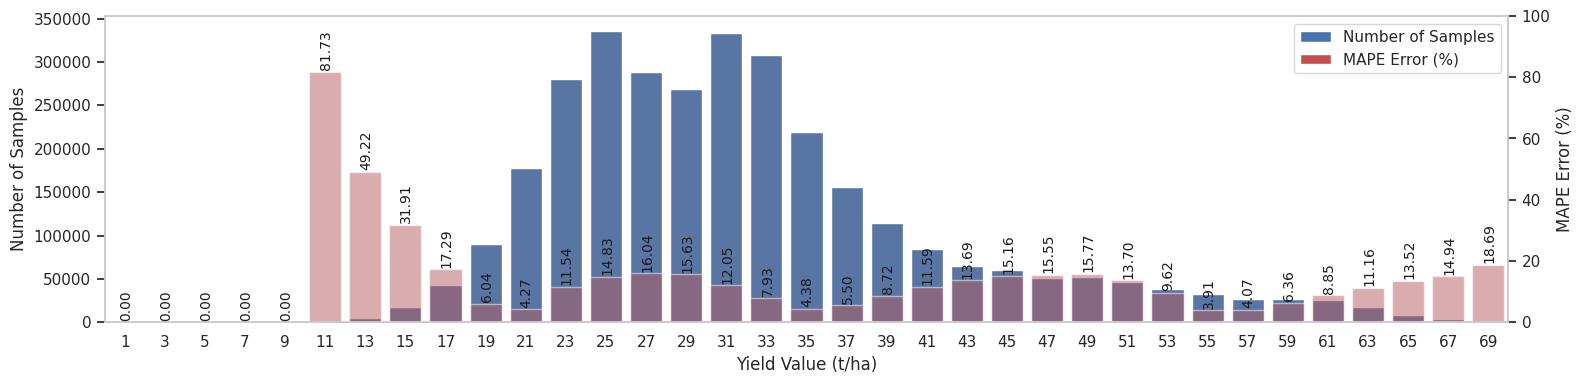

In [47]:
_ = yz.mape_per_bin_plot()

### YieldZone15

In [4]:
exp_name = '09_lr001_wd05_drop30_yz15'
yz15 = inf.performance(exp_name)

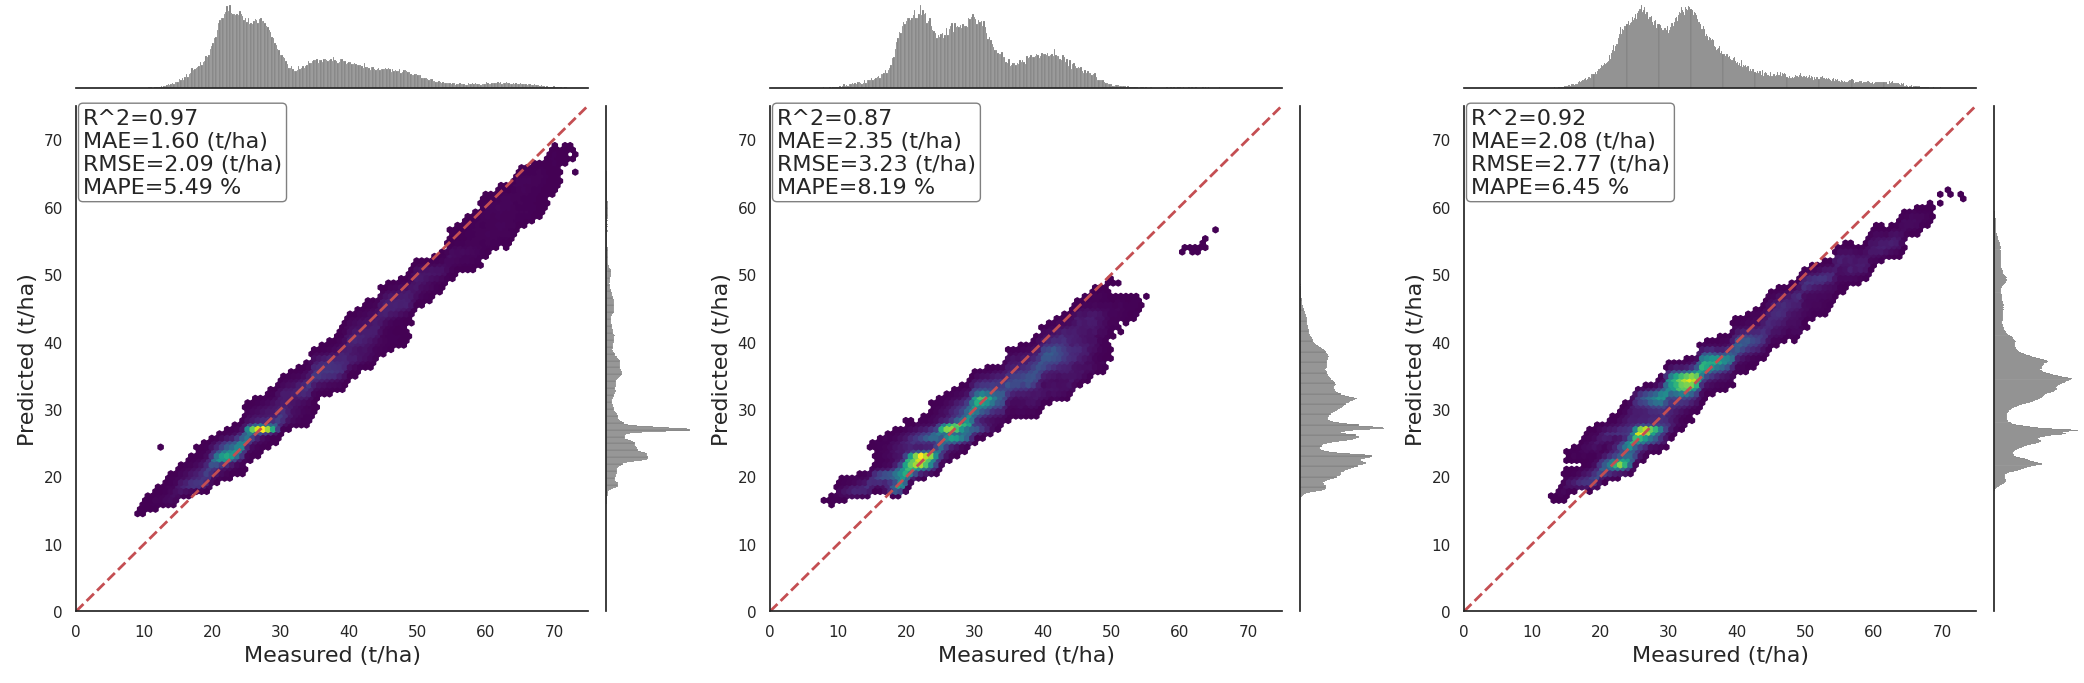

In [5]:
yz15.scatter_plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


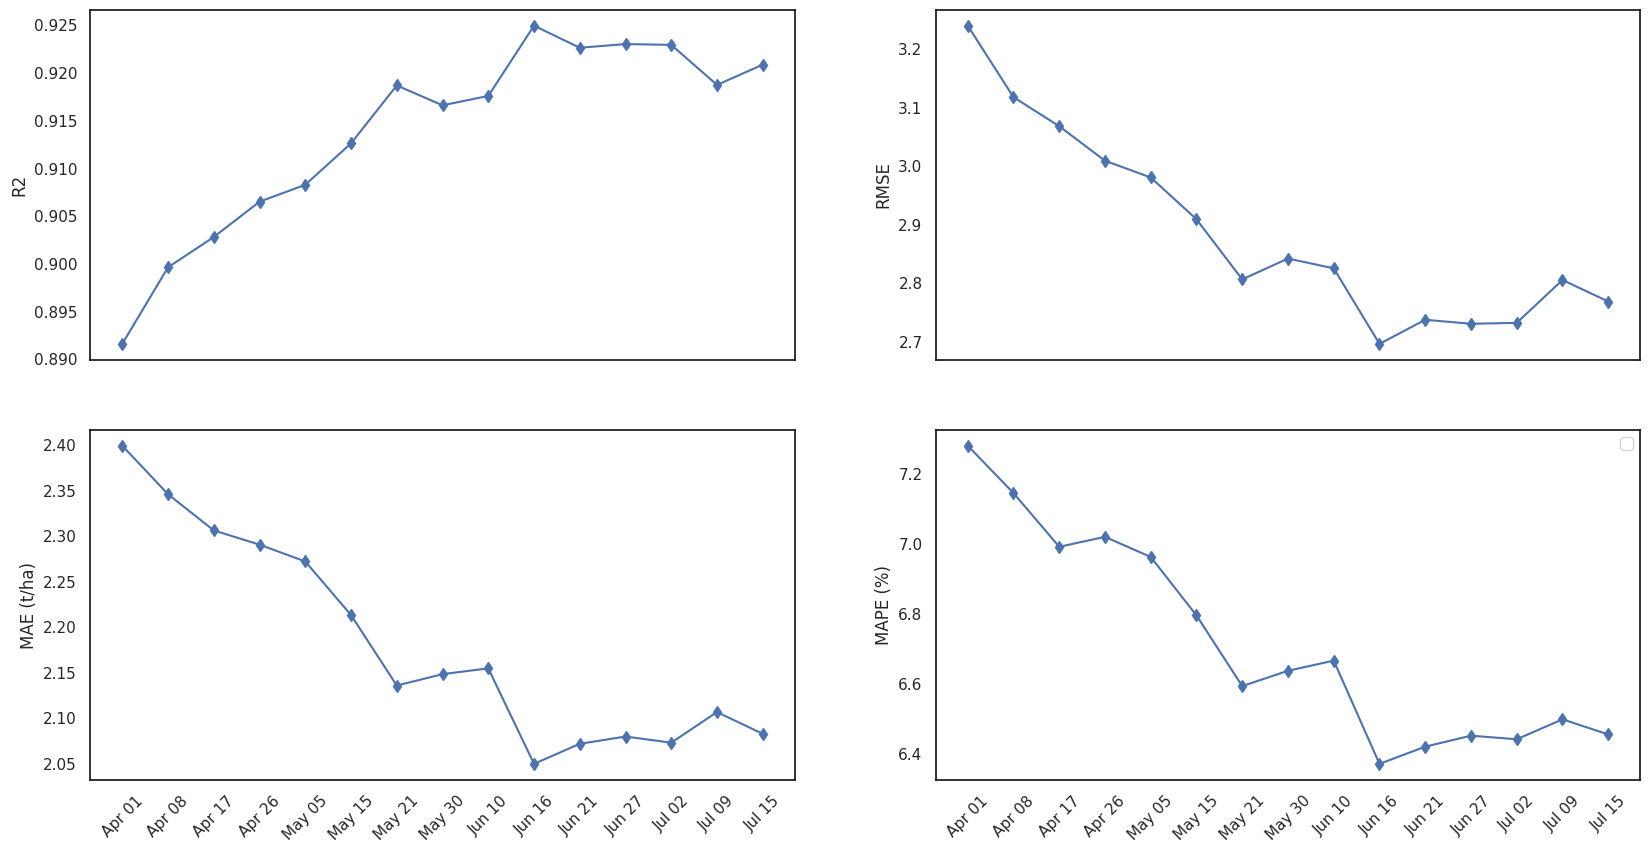

weeks   R2_mean  MAE_mean  RMSE_mean  MAPE_mean
0   Apr 01  0.891614  2.399486   3.239685   7.280036
1   Apr 08  0.899633  2.346138   3.117537   7.144694
2   Apr 17  0.902810  2.306404   3.067792   6.991133
3   Apr 26  0.906513  2.290757   3.008796   7.019519
4   May 05  0.908282  2.272251   2.980182   6.962088
5   May 15  0.912625  2.213423   2.908764   6.794992
6   May 21  0.918694  2.135965   2.805939   6.593001
7   May 30  0.916613  2.148449   2.841607   6.636806
8   Jun 10  0.917593  2.154841   2.824864   6.665844
9   Jun 16  0.924955  2.049896   2.695726   6.370824
10  Jun 21  0.922644  2.071938   2.736919   6.419962
11  Jun 27  0.923030  2.079913   2.730091   6.451385
12  Jul 02  0.922945  2.073188   2.731599   6.441128
13  Jul 09  0.918751  2.106810   2.804955   6.498116
14  Jul 15  0.920872  2.082875   2.768099   6.454957

In [6]:
yz15.time_series_plot()

In [8]:
_ = yz15.mape_per_yield_range(th1 = MIN_EXTREME_VALUE_Threshold, 
                            th2 = Max_EXTREME_VALUE_Threshold)

C1 num samples: 253350 | C2 num samples: 2777236 | C3 num samples: 154822
C1 is yield value between 0 and 22.24, C2 is yield value between 22.24 and 54.36, and C3 is yield value bigger than 54.36
All: MAE = 2.08, MAPE = 6.45 | C1: MAE = 2.05, MAPE = 11.13 | C2: MAE = 1.85, MAPE = 5.81 | C3: MAE = 6.31, MAPE = 10.43


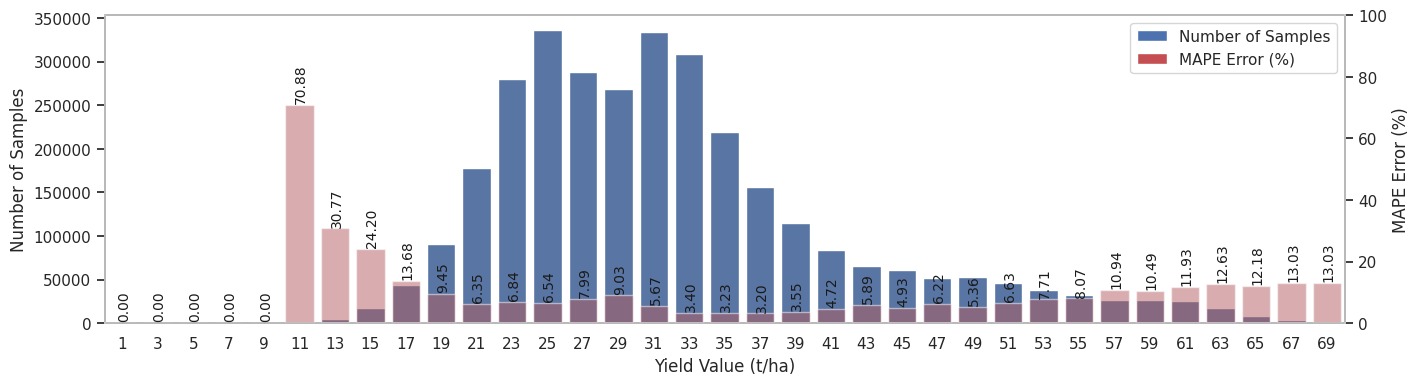

In [9]:
_ = yz15.mape_per_bin_plot()

### YieldZone9

In [3]:
exp_name = '10_lr001_wd05_drop30_yz9'
yz9 = inf.performance(exp_name)

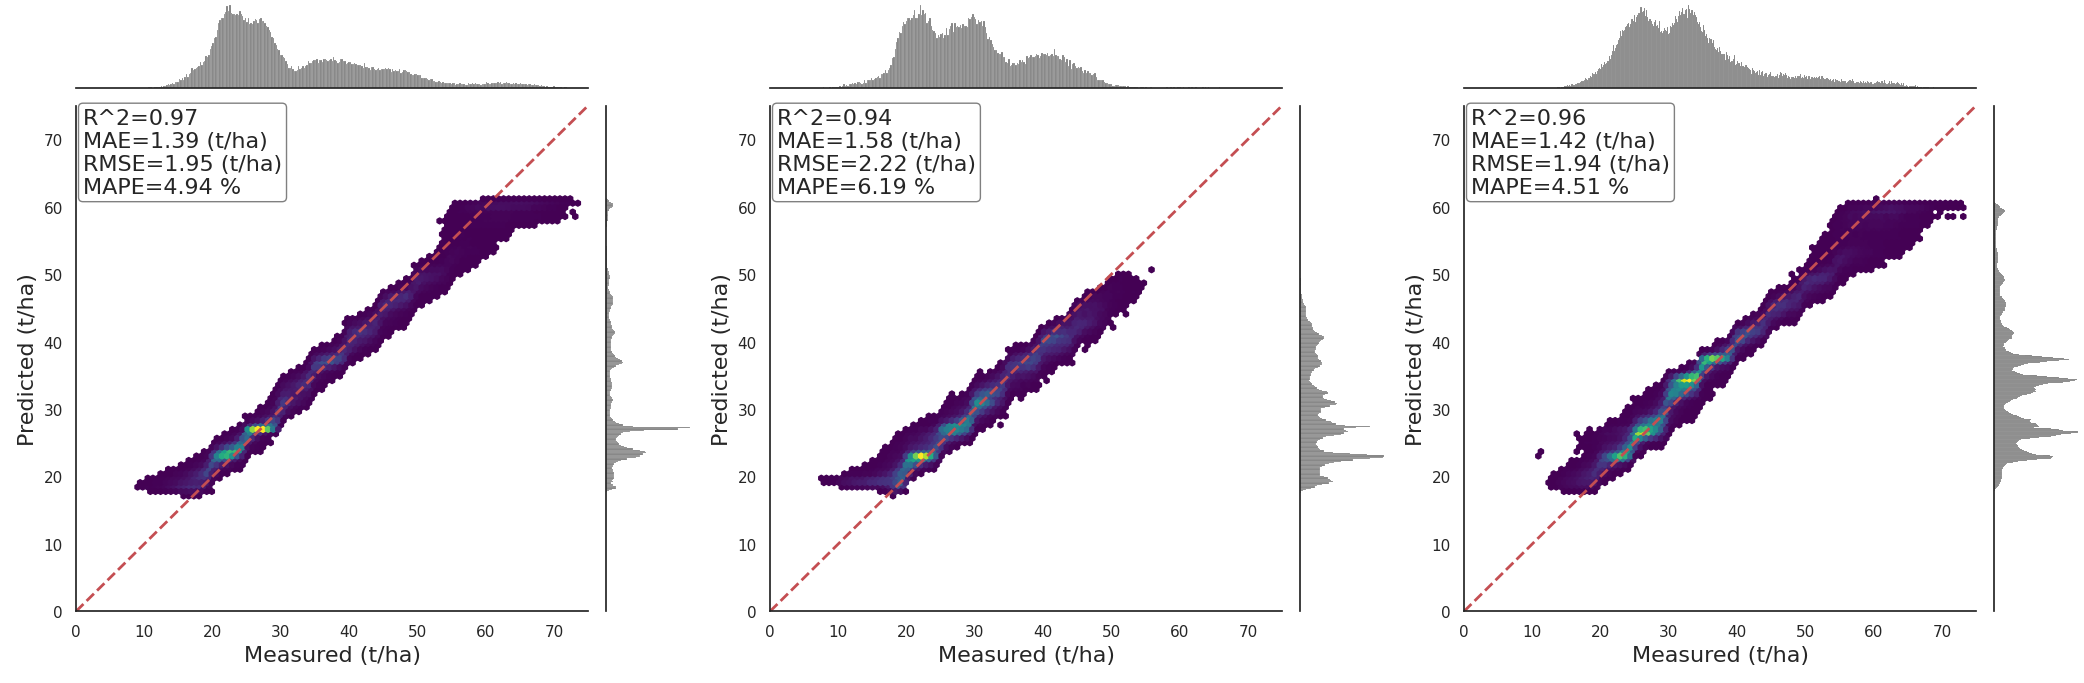

In [4]:
yz9.scatter_plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


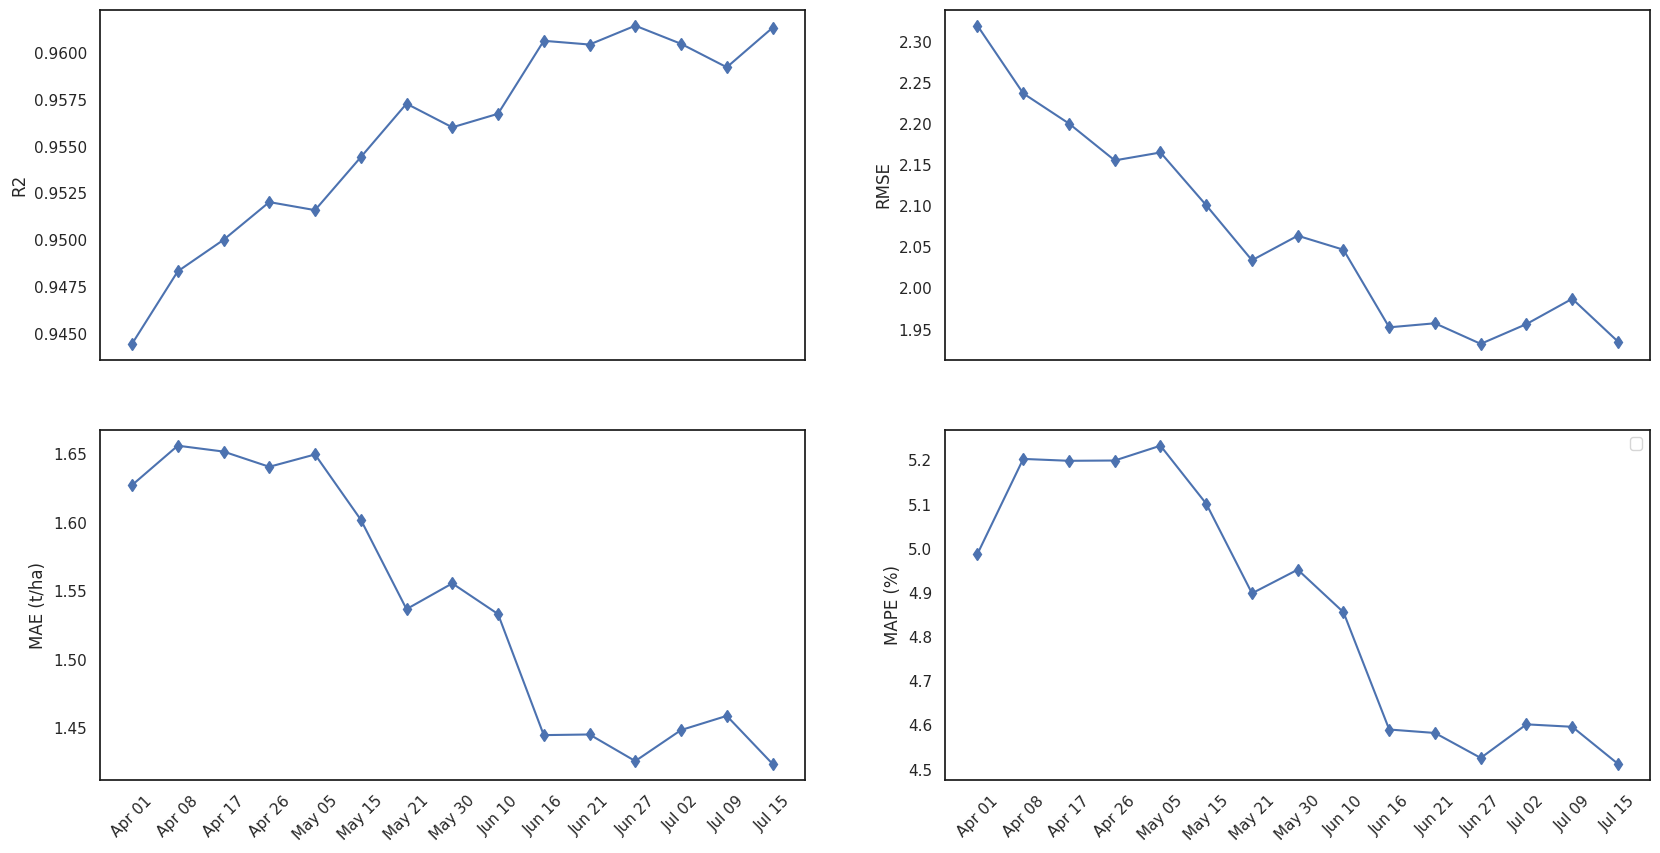

weeks   R2_mean  MAE_mean  RMSE_mean  MAPE_mean
0   Apr 01  0.944449  1.627406   2.319328   4.987972
1   Apr 08  0.948323  1.656193   2.236984   5.203042
2   Apr 17  0.950004  1.651896   2.200311   5.198774
3   Apr 26  0.952020  1.640771   2.155484   5.199414
4   May 05  0.951591  1.649782   2.165110   5.232995
5   May 15  0.954418  1.602177   2.100933   5.101632
6   May 21  0.957275  1.536830   2.034024   4.898751
7   May 30  0.956012  1.555638   2.063871   4.952254
8   Jun 10  0.956736  1.533245   2.046819   4.855872
9   Jun 16  0.960633  1.444822   1.952462   4.590289
10  Jun 21  0.960434  1.445289   1.957386   4.582463
11  Jun 27  0.961440  1.425865   1.932340   4.525900
12  Jul 02  0.960473  1.448513   1.956428   4.601996
13  Jul 09  0.959220  1.458882   1.987201   4.596457
14  Jul 15  0.961330  1.423827   1.935097   4.512501

In [5]:
yz9.time_series_plot()

In [6]:
_ = yz9.mape_per_yield_range(th1 = MIN_EXTREME_VALUE_Threshold, 
                            th2 = Max_EXTREME_VALUE_Threshold)

C1 num samples: 506700 | C2 num samples: 5554472 | C3 num samples: 309644
C1 is yield value between 0 and 22.24, C2 is yield value between 22.24 and 54.36, and C3 is yield value bigger than 54.36
All: MAE = 1.42, MAPE = 4.51 | C1: MAE = 2.09, MAPE = 11.30 | C2: MAE = 1.23, MAPE = 3.80 | C3: MAE = 3.77, MAPE = 6.17


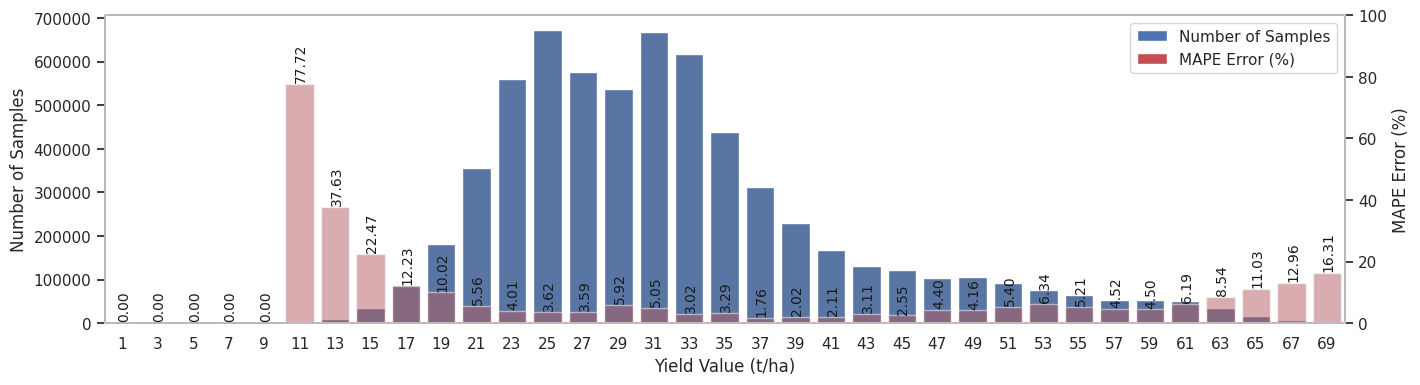

In [7]:
_ = yz9.mape_per_bin_plot()

### YieldZone11

In [8]:
exp_name = '11_lr001_wd05_drop30_yz11'
yz11 = inf.performance(exp_name)

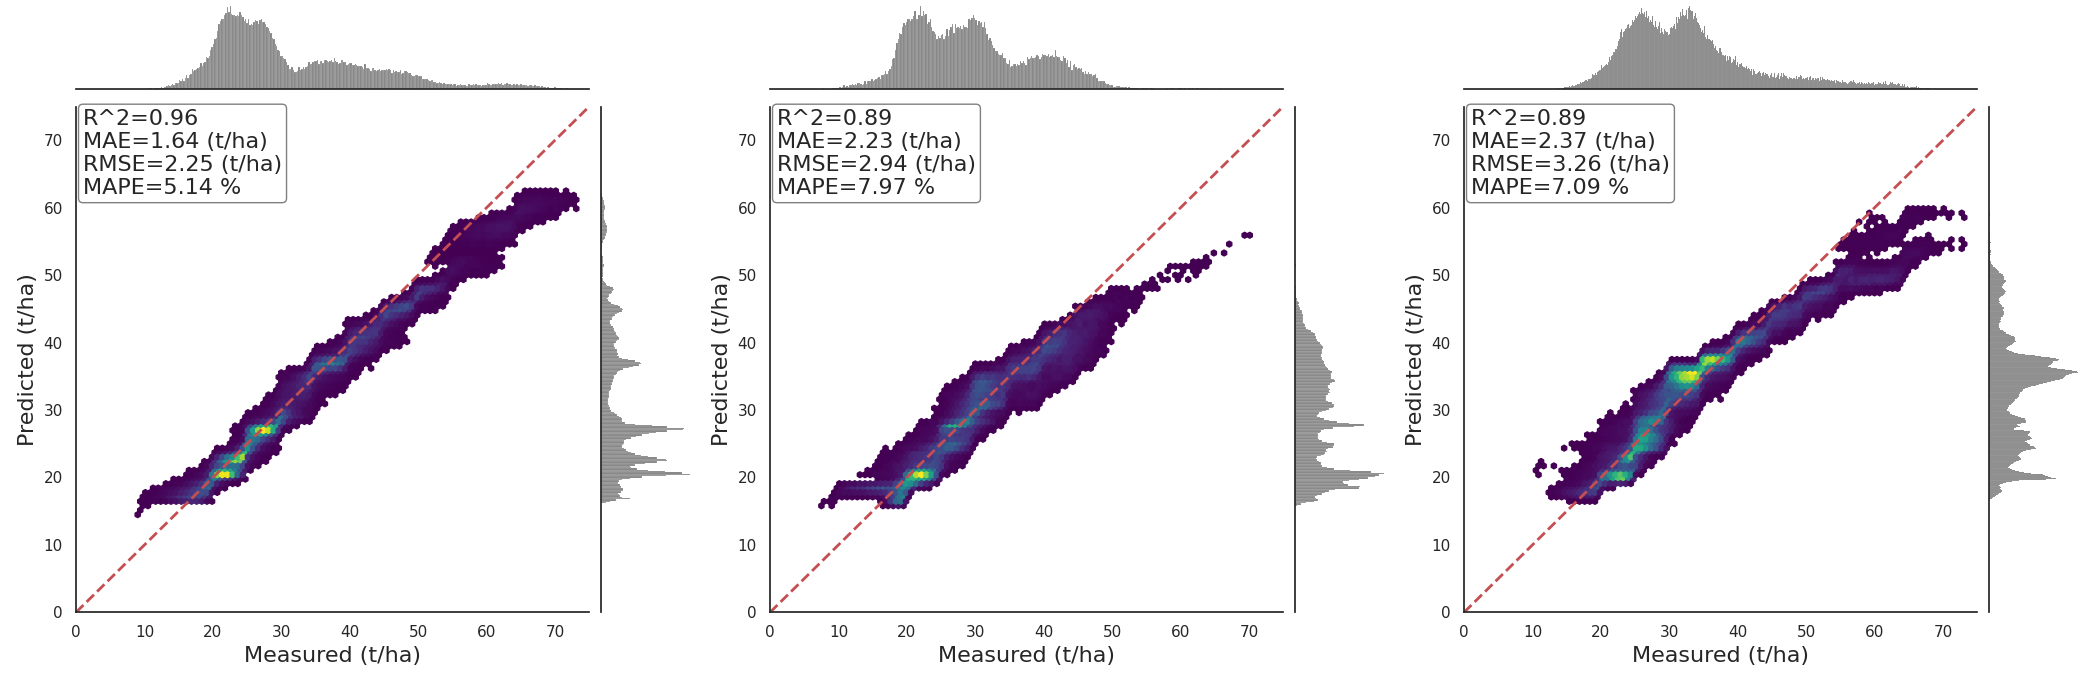

In [9]:
yz11.scatter_plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


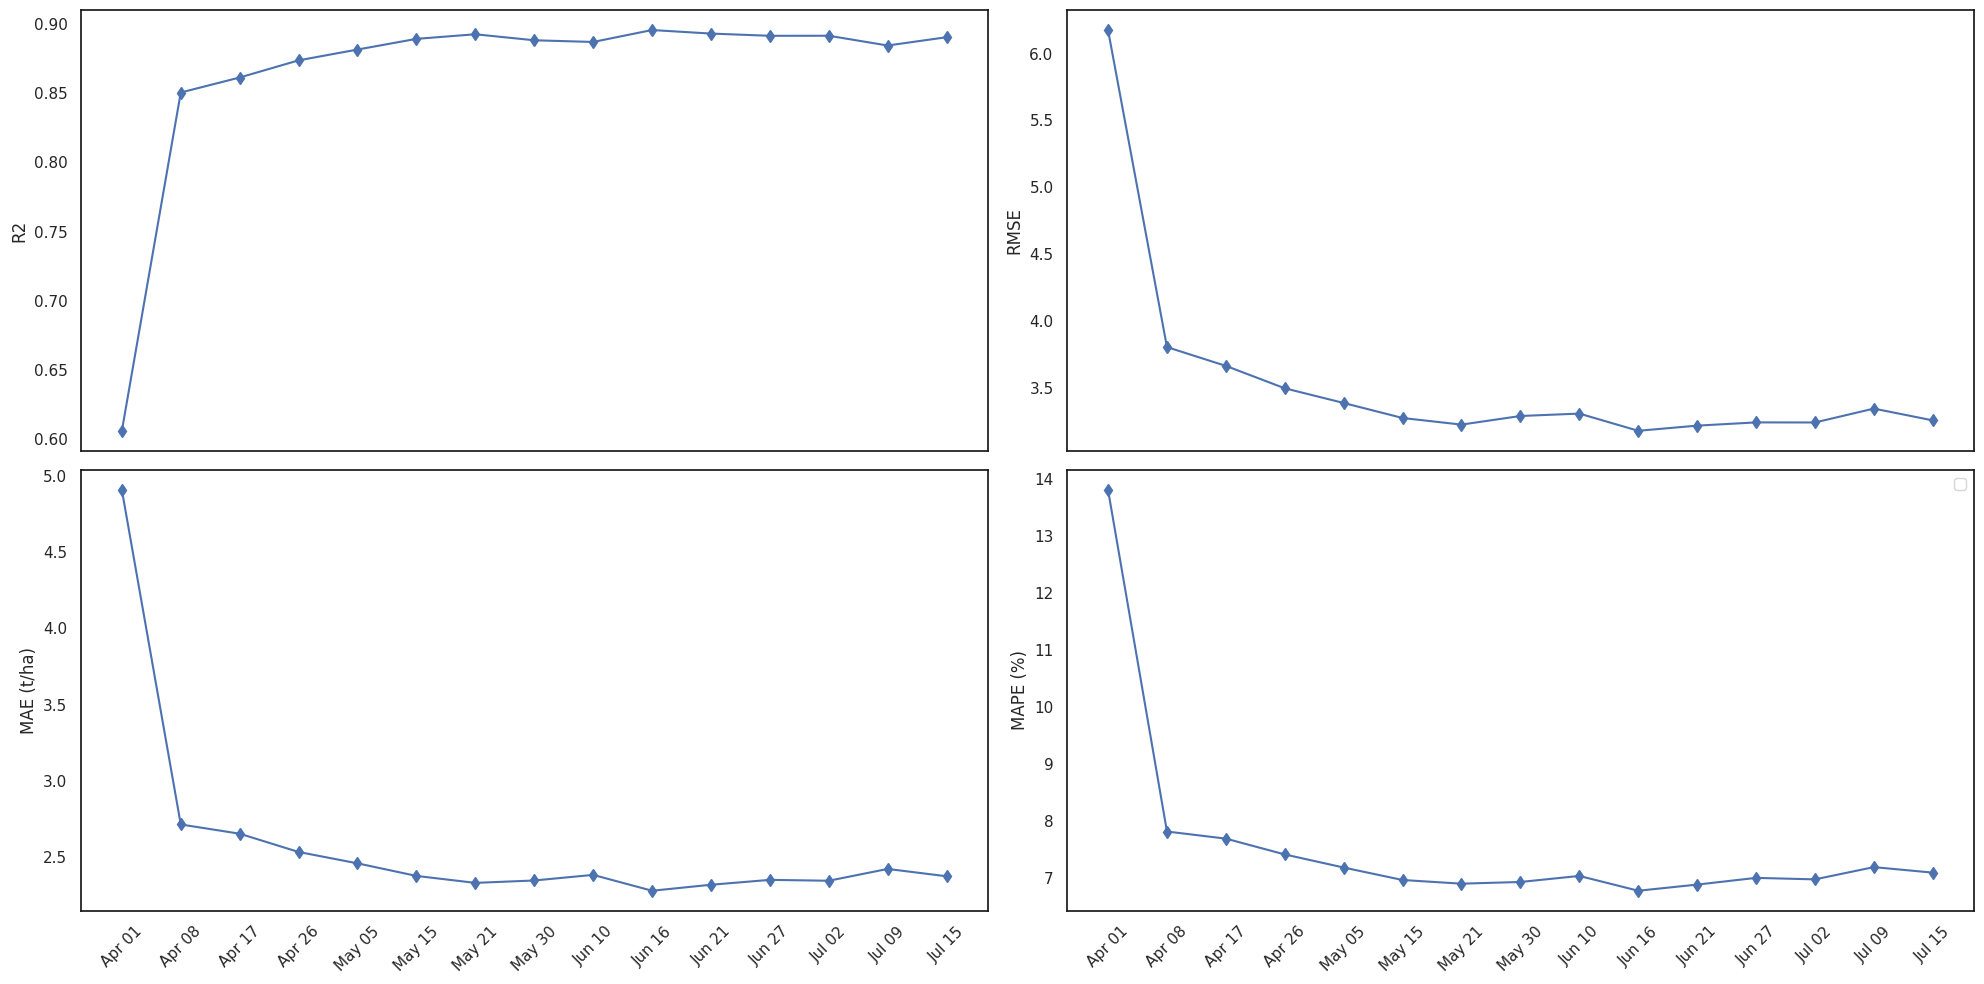

weeks   R2_mean  MAE_mean  RMSE_mean  MAPE_mean
0   Apr 01  0.606006  4.908958   6.176763  13.804125
1   Apr 08  0.850579  2.713730   3.803834   7.811245
2   Apr 17  0.861431  2.653073   3.663109   7.686338
3   Apr 26  0.873824  2.533176   3.495464   7.408834
4   May 05  0.881637  2.458557   3.385511   7.179084
5   May 15  0.889365  2.375972   3.273128   6.960398
6   May 21  0.892682  2.330338   3.223679   6.896023
7   May 30  0.888345  2.346025   3.288181   6.925790
8   Jun 10  0.887120  2.382759   3.306163   7.031869
9   Jun 16  0.895745  2.278724   3.177345   6.772005
10  Jun 21  0.893194  2.317963   3.215983   6.879788
11  Jun 27  0.891580  2.350123   3.240197   6.997751
12  Jul 02  0.891616  2.344285   3.239650   6.971443
13  Jul 09  0.884555  2.421853   3.343518   7.186524
14  Jul 15  0.890565  2.373652   3.255318   7.089841

In [10]:
yz11.time_series_plot()

In [11]:
_ = yz11.mape_per_yield_range(th1 = MIN_EXTREME_VALUE_Threshold, 
                            th2 = Max_EXTREME_VALUE_Threshold)

C1 num samples: 506700 | C2 num samples: 5554472 | C3 num samples: 309644
C1 is yield value between 0 and 22.24, C2 is yield value between 22.24 and 54.36, and C3 is yield value bigger than 54.36
All: MAE = 2.37, MAPE = 7.09 | C1: MAE = 1.59, MAPE = 8.46 | C2: MAE = 2.08, MAPE = 6.53 | C3: MAE = 9.02, MAPE = 14.87


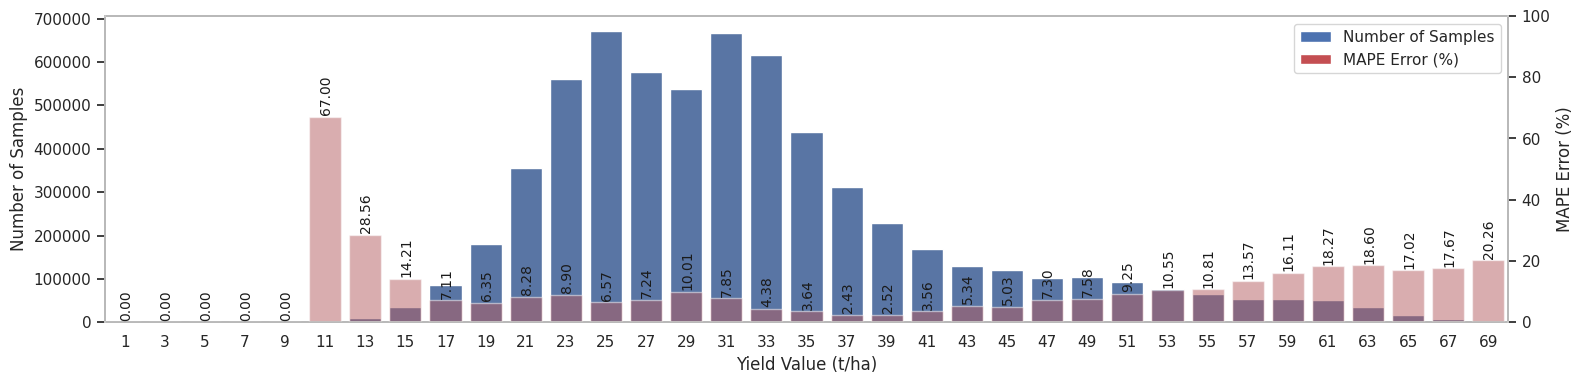

In [12]:
_ = yz11.mape_per_bin_plot()

### YZ + Resampling

In [4]:
exp_name = '12_lr001_wd05_drop30_yzr9'
yzr9 = inf.performance(exp_name)

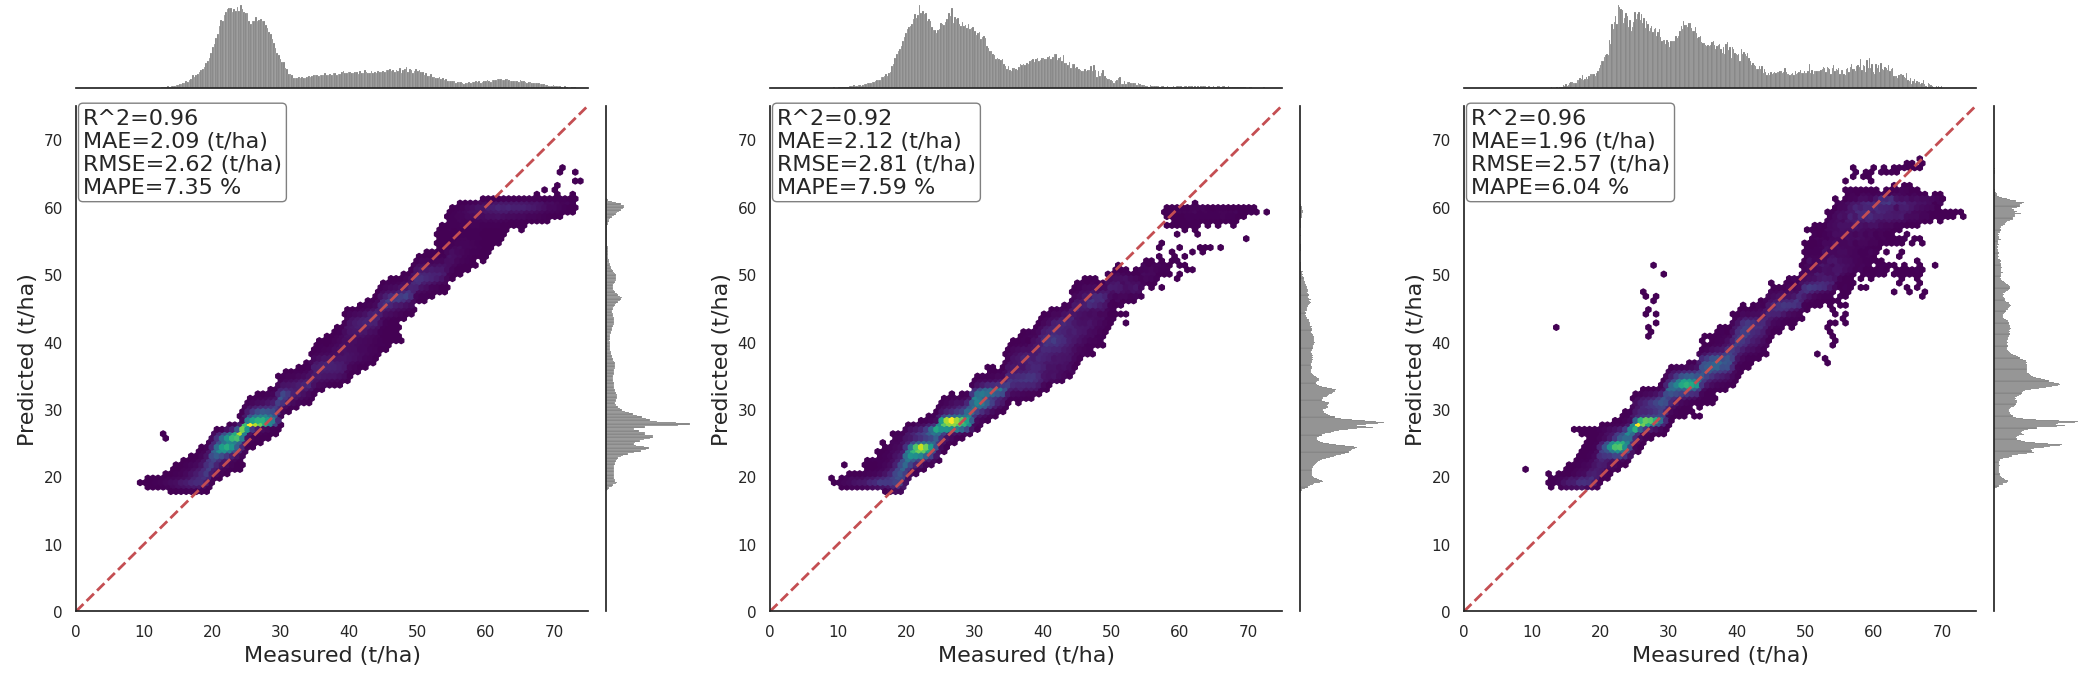

In [5]:
yzr9.scatter_plot()

### YZ + ExtremeW

In [6]:
exp_name = '13_lr001_wd05_drop30_exyz9'
exyz9 = inf.performance(exp_name)

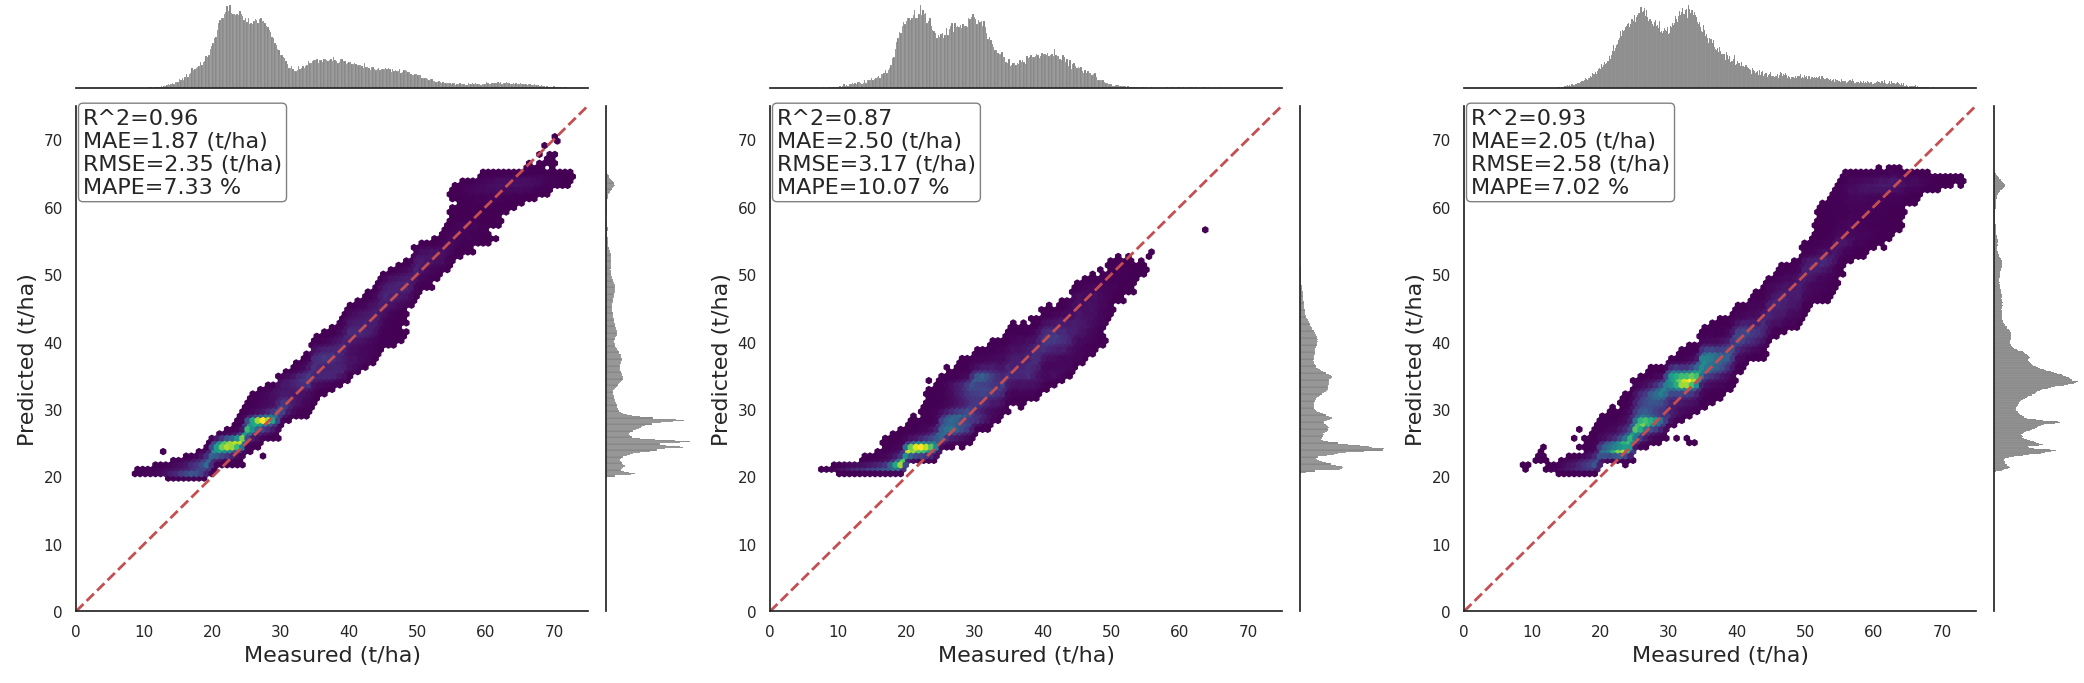

In [7]:
exyz9.scatter_plot()

### EXtYZ (ours)

In [33]:
exp_name = '08_lr001_wd05_drop30_ExtYZ'
ExtYZ = inf.performance(exp_name)

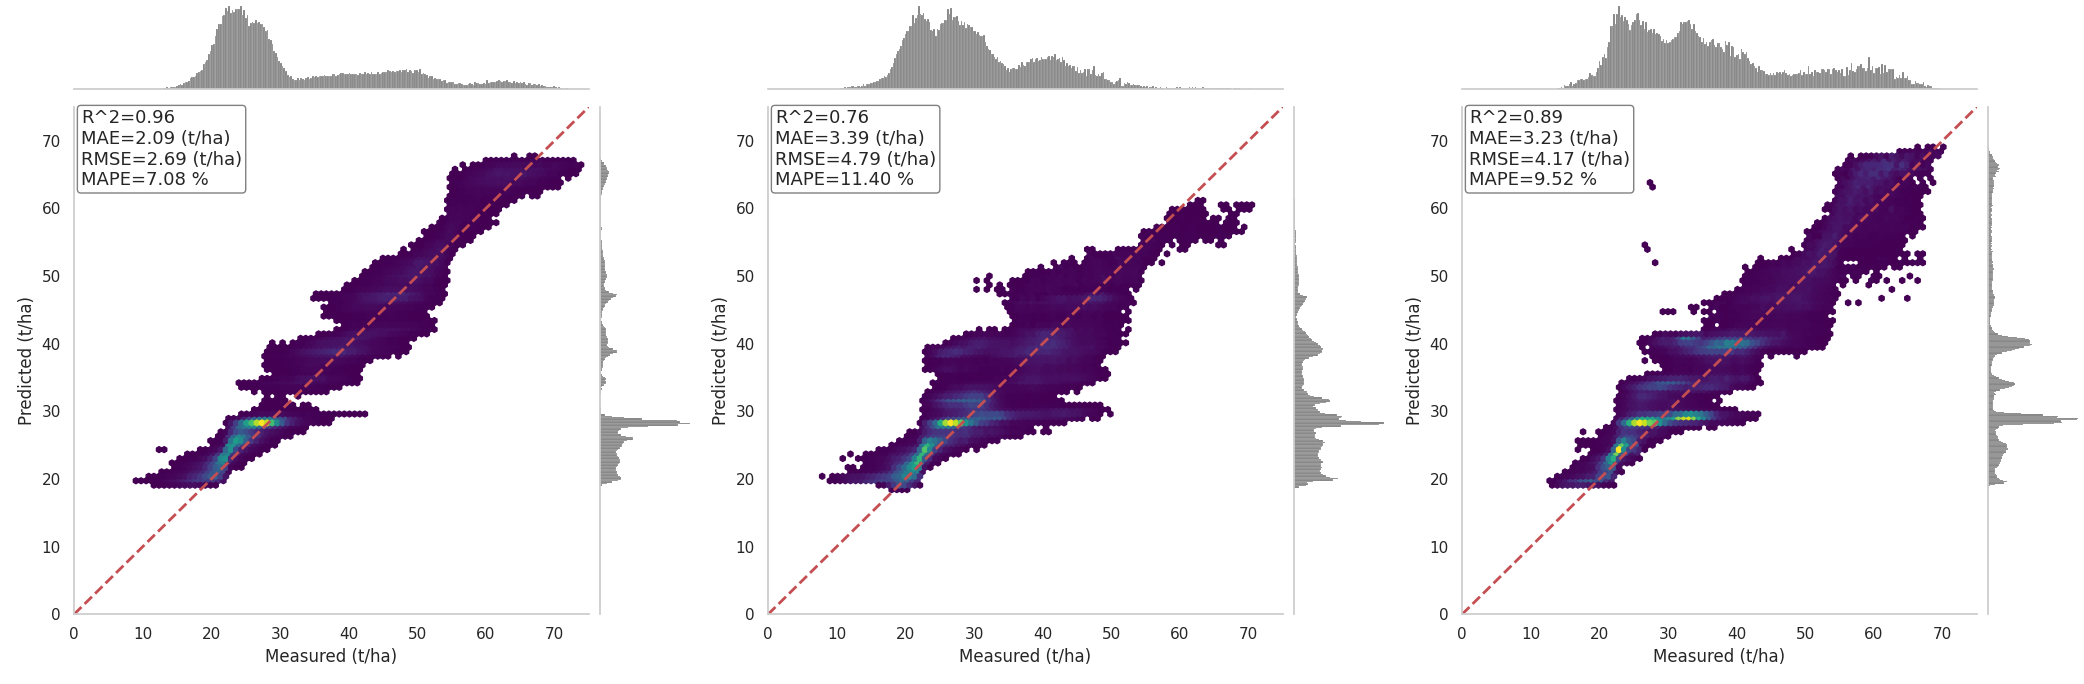

In [34]:
ExtYZ.scatter_plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


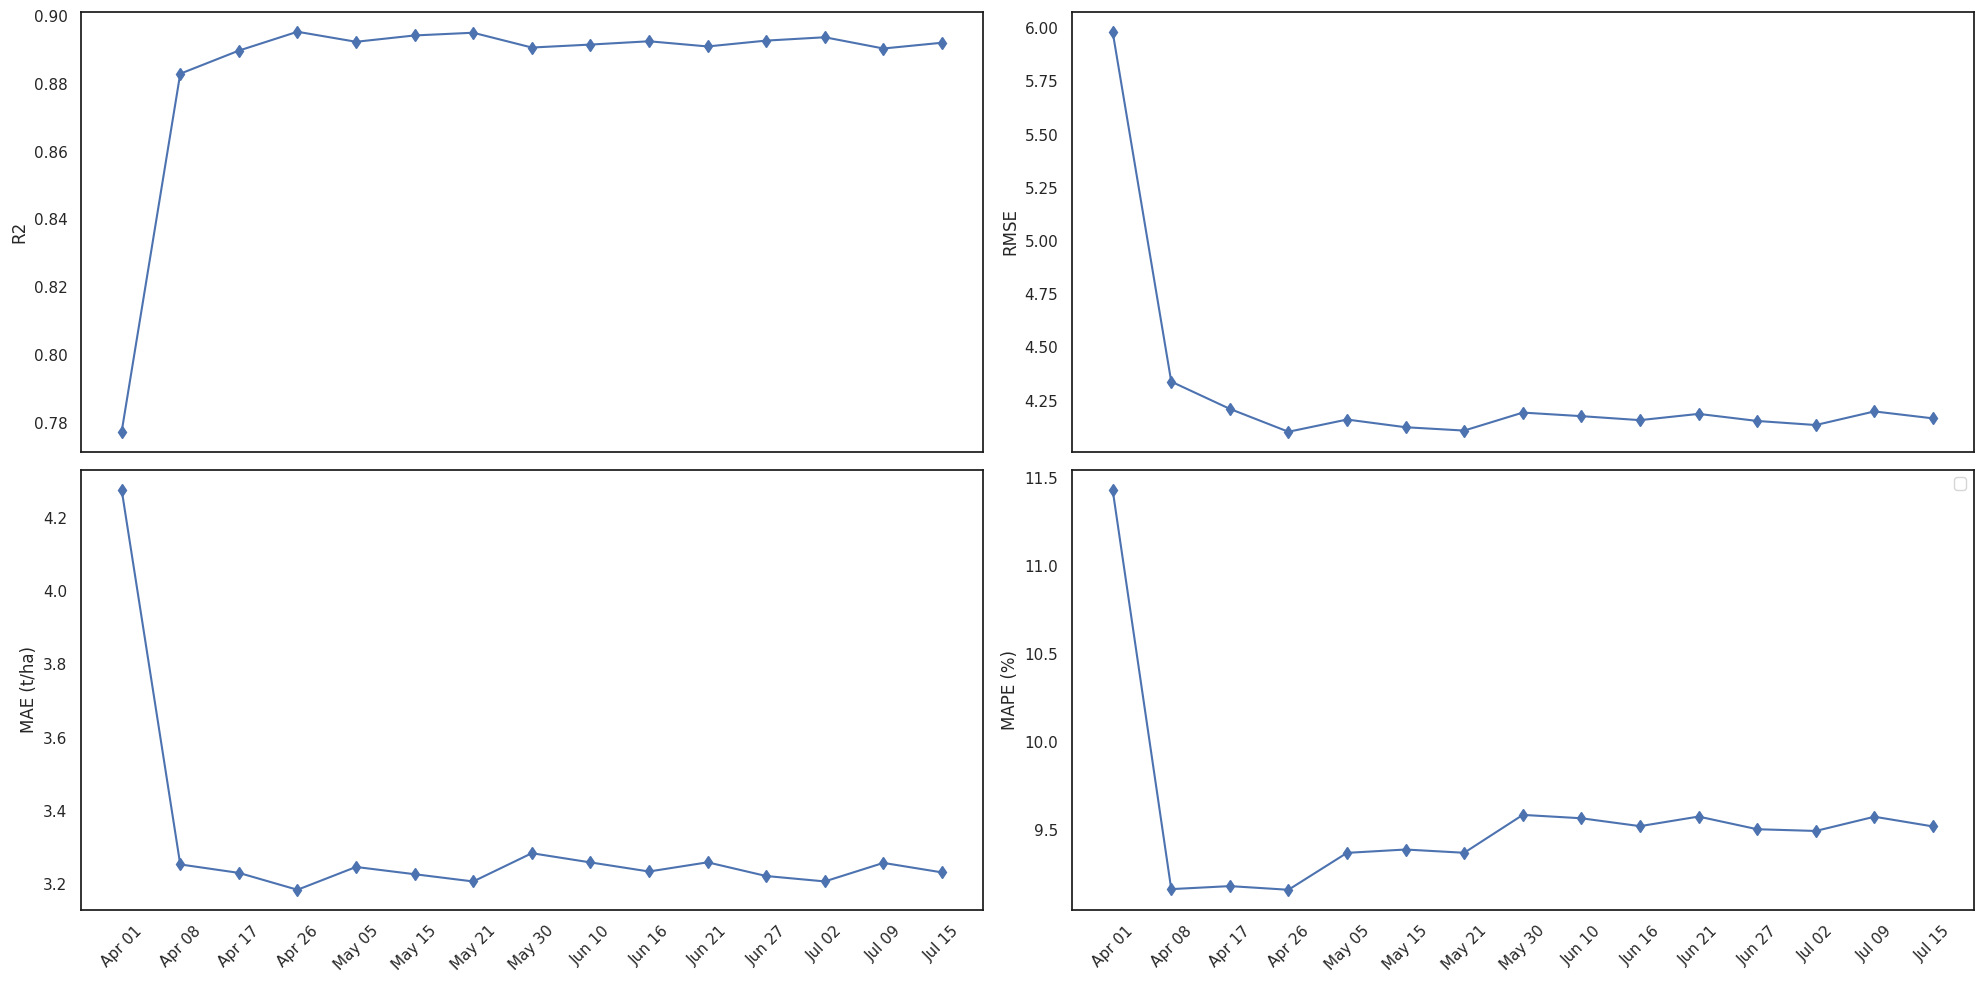

weeks   R2_mean  MAE_mean  RMSE_mean  MAPE_mean
0   Apr 01  0.777307  4.276012   5.983004  11.430141
1   Apr 08  0.882925  3.253729   4.338086   9.165279
2   Apr 17  0.889738  3.230692   4.209975   9.182321
3   Apr 26  0.895303  3.184572   4.102350   9.161519
4   May 05  0.892347  3.246822   4.159859   9.370935
5   May 15  0.894214  3.227038   4.123638   9.389829
6   May 21  0.895016  3.207241   4.107969   9.371372
7   May 30  0.890648  3.284360   4.192551   9.586233
8   Jun 10  0.891524  3.259265   4.175733   9.567053
9   Jun 16  0.892494  3.234446   4.157011   9.522359
10  Jun 21  0.890968  3.259495   4.186411   9.576717
11  Jun 27  0.892692  3.222110   4.153186   9.504909
12  Jul 02  0.893681  3.207354   4.134015   9.495121
13  Jul 09  0.890364  3.257931   4.198005   9.575811
14  Jul 15  0.892064  3.232002   4.165316   9.520695

In [35]:
ExtYZ.time_series_plot()

In [36]:
_ = ExtYZ.mape_per_yield_range(th1 = MIN_EXTREME_VALUE_Threshold, 
                                             th2 = Max_EXTREME_VALUE_Threshold)

C1 num samples: 296818 | C2 num samples: 2462745 | C3 num samples: 425845
C1 is yield value between 0 and 22.24, C2 is yield value between 22.24 and 54.36, and C3 is yield value bigger than 54.36
All: MAE = 3.23, MAPE = 9.52 | C1: MAE = 1.72, MAPE = 9.39 | C2: MAE = 3.23, MAPE = 9.94 | C3: MAE = 4.30, MAPE = 7.21


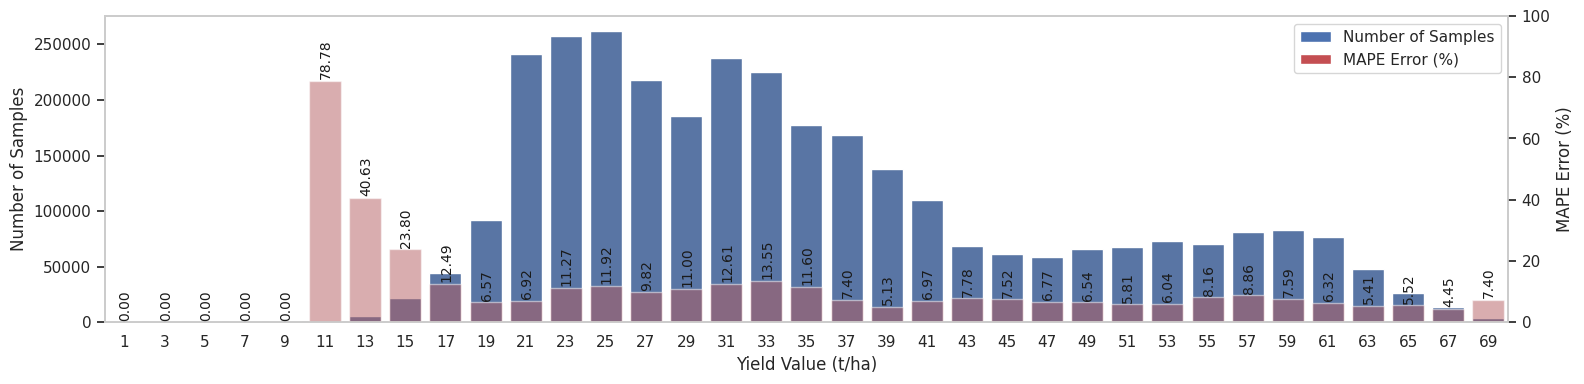

In [37]:
_ = ExtYZ.mape_per_bin_plot()

### Ours

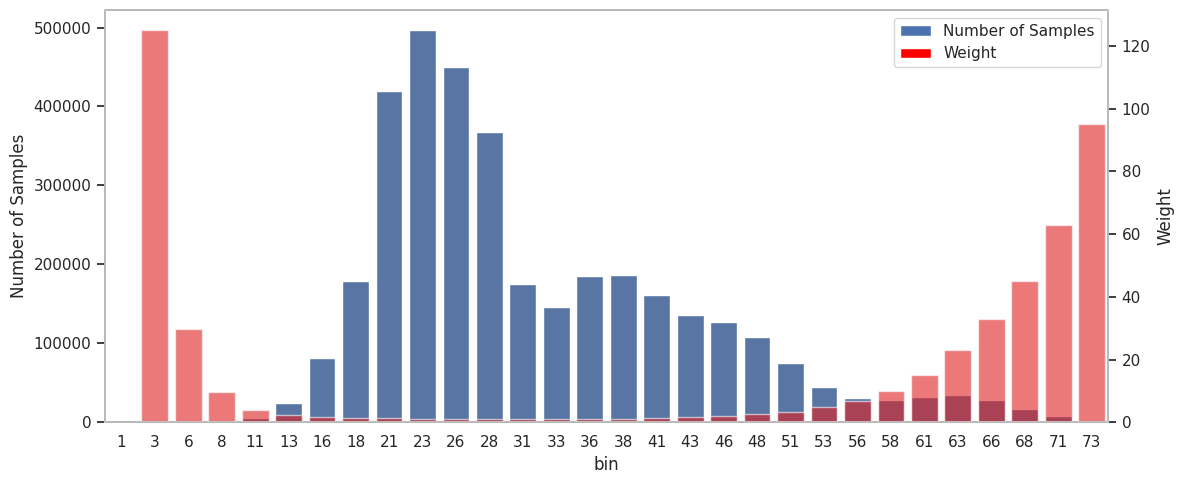

In [35]:
weight_means = inf.weight_vis(method = 'ours', lds_ks= 10, lds_sigma = 8,
               ).plot()

## Year Block Hold OUt

In [8]:
exp_name = '14_lr001_wd05_drop30_yz9_byho'
byho = inf.performance(exp_name)

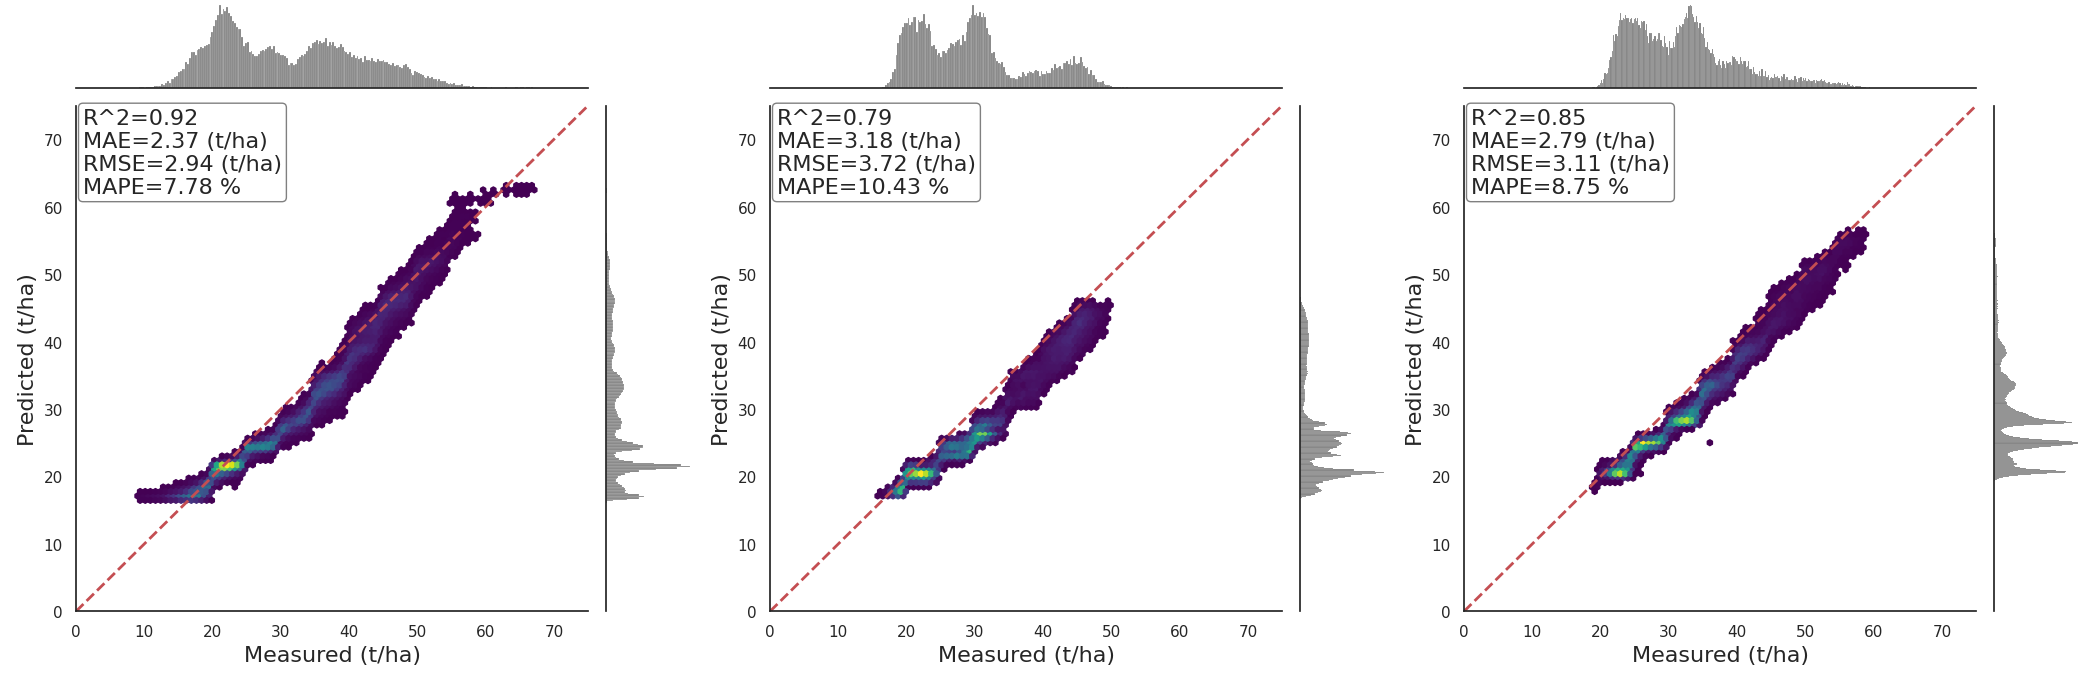

In [9]:
byho.scatter_plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


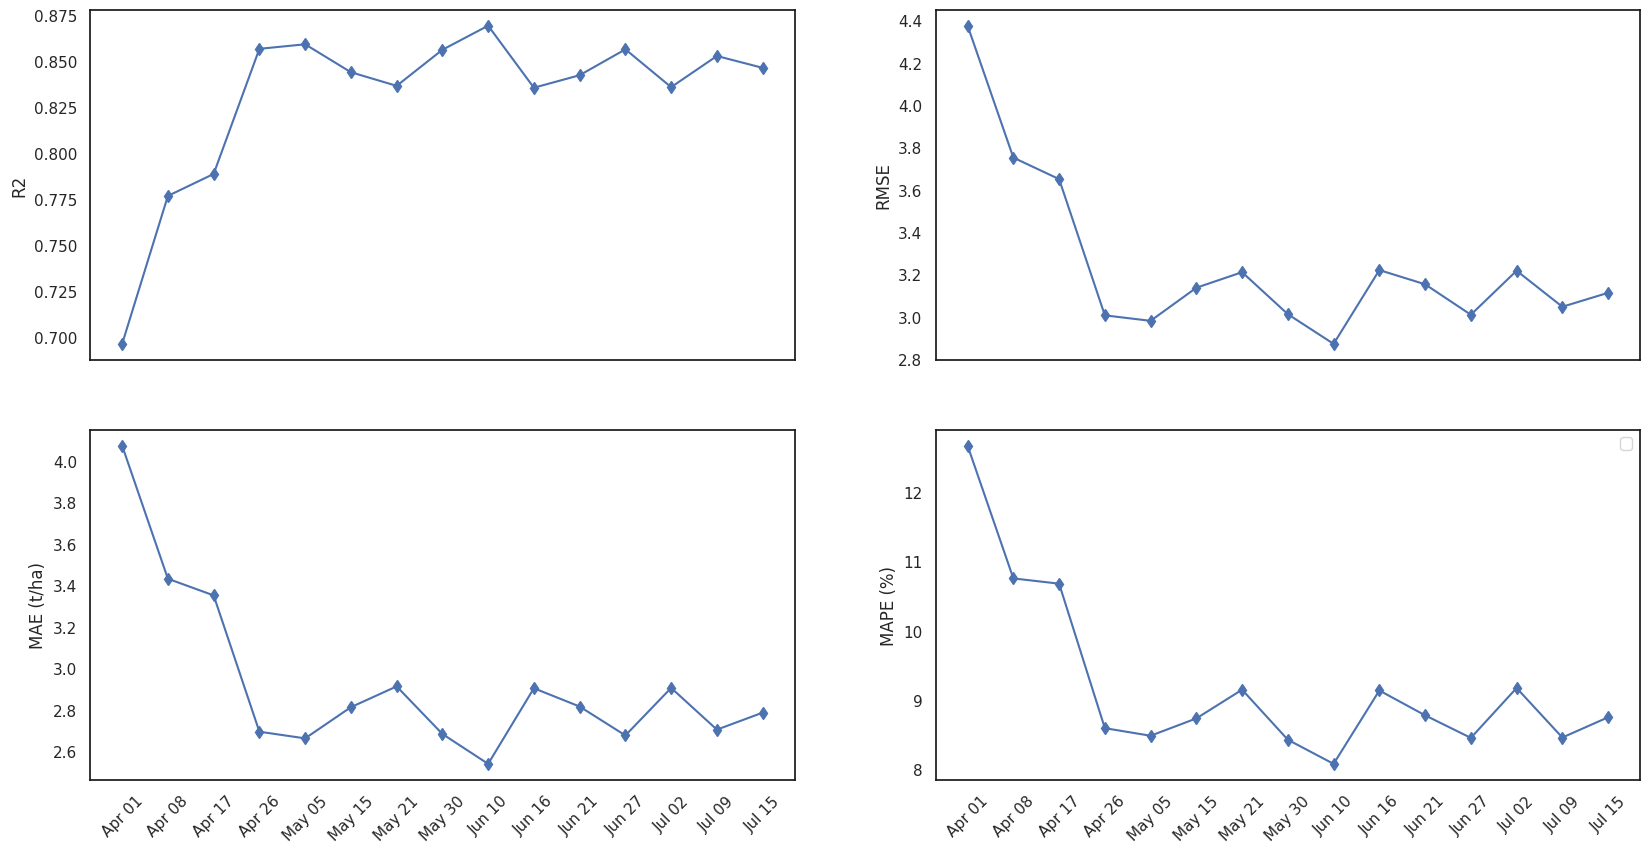

weeks   R2_mean  MAE_mean  RMSE_mean  MAPE_mean
0   Apr 01  0.696524  4.072060   4.374642  12.663925
1   Apr 08  0.776843  3.431211   3.751335  10.751603
2   Apr 17  0.788755  3.351104   3.649837  10.676057
3   Apr 26  0.856688  2.694619   3.006224   8.594162
4   May 05  0.859140  2.662589   2.980403   8.484829
5   May 15  0.843977  2.812795   3.136708   8.734636
6   May 21  0.836583  2.912851   3.210176   9.148375
7   May 30  0.856166  2.683778   3.011696   8.427275
8   Jun 10  0.869240  2.539784   2.871563   8.079716
9   Jun 16  0.835563  2.904040   3.220184   9.136786
10  Jun 21  0.842352  2.815841   3.153004   8.779142
11  Jun 27  0.856403  2.676727   3.009215   8.454060
12  Jul 02  0.835880  2.905598   3.217078   9.172706
13  Jul 09  0.852789  2.704600   3.046843   8.459300
14  Jul 15  0.846353  2.786447   3.112741   8.751009

In [10]:
byho.time_series_plot()

In [11]:
_ = byho.mape_per_yield_range(th1 = MIN_EXTREME_VALUE_Threshold, 
                                             th2 = Max_EXTREME_VALUE_Threshold)

C1 num samples: 78656 | C2 num samples: 1488244 | C3 num samples: 20300
C1 is yield value between 0 and 22.24, C2 is yield value between 22.24 and 54.36, and C3 is yield value bigger than 54.36
All: MAE = 2.79, MAPE = 8.75 | C1: MAE = 1.02, MAPE = 4.98 | C2: MAE = 2.89, MAPE = 9.02 | C3: MAE = 2.24, MAPE = 3.94


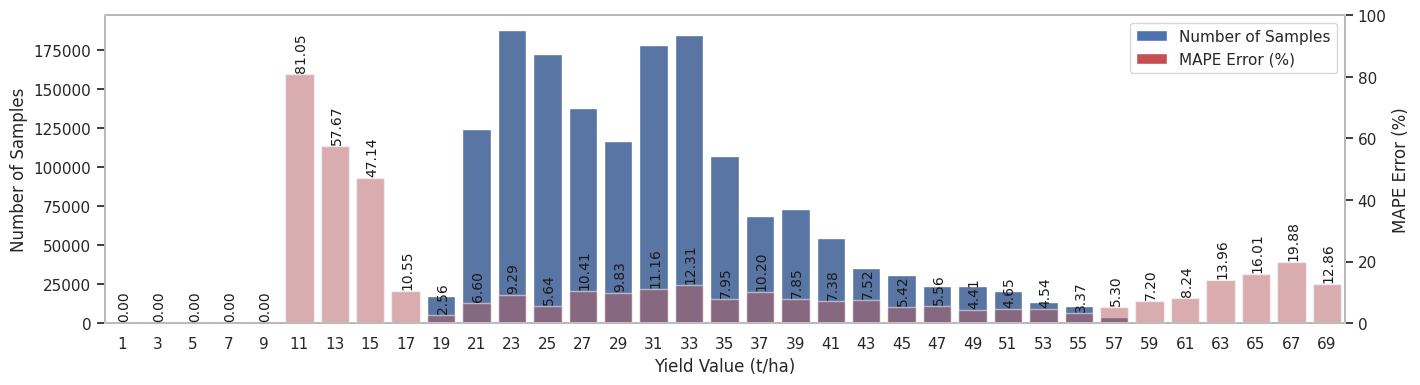

In [12]:
_ = byho.mape_per_bin_plot()

##### YBHO 2

In [5]:
exp_name = '15_lr001_wd05_drop30_yz9_byho_NOCOND'
byho2 = inf.performance(exp_name)

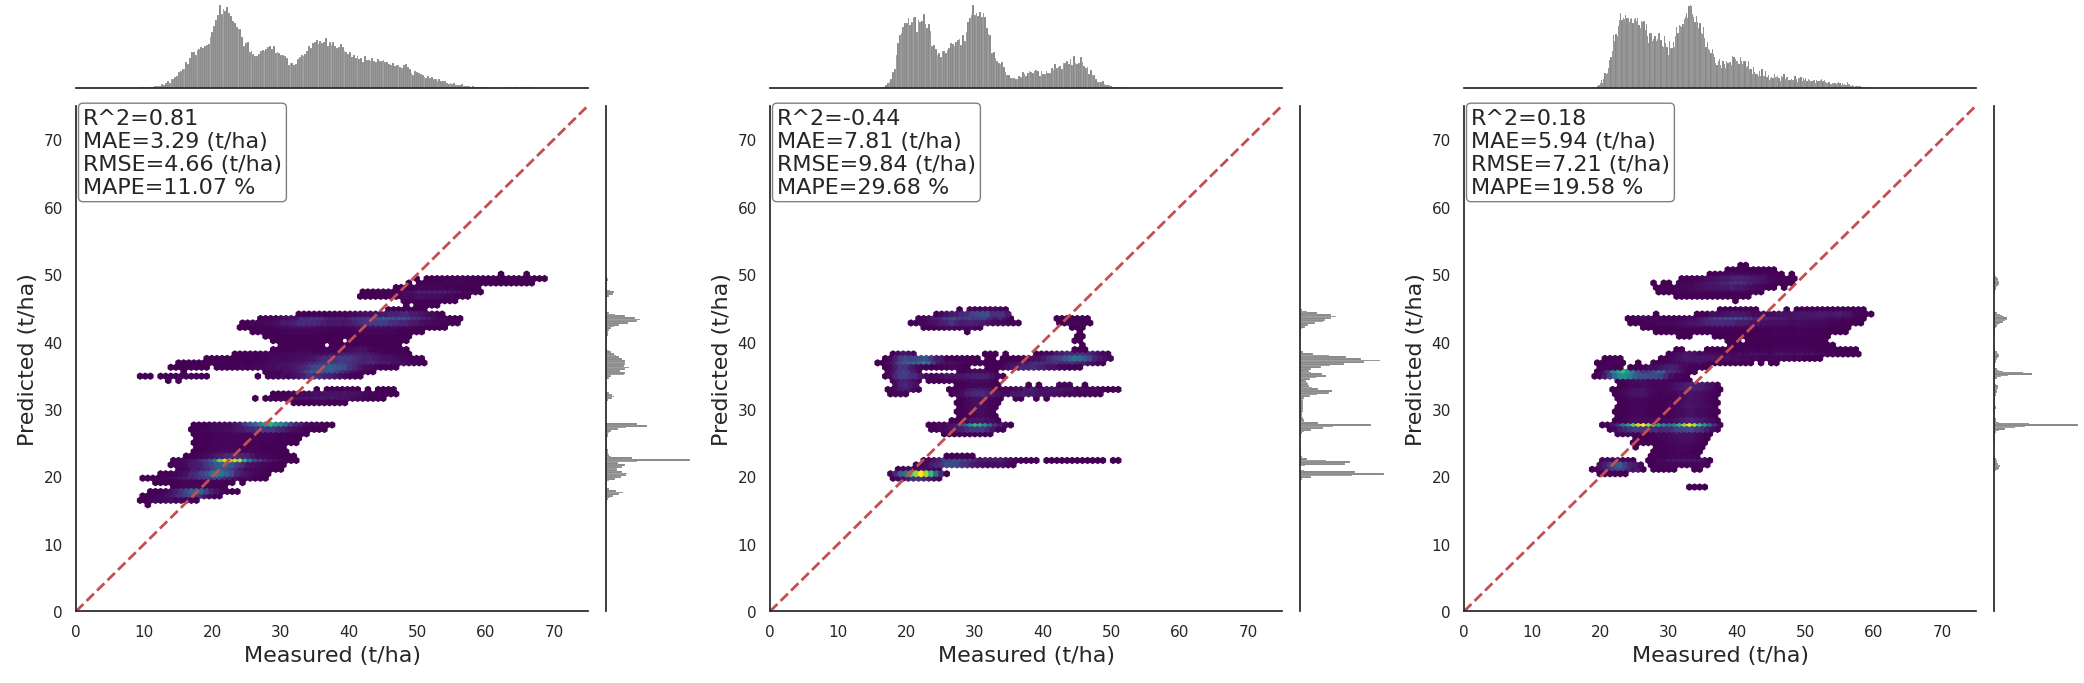

In [6]:
byho2.scatter_plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


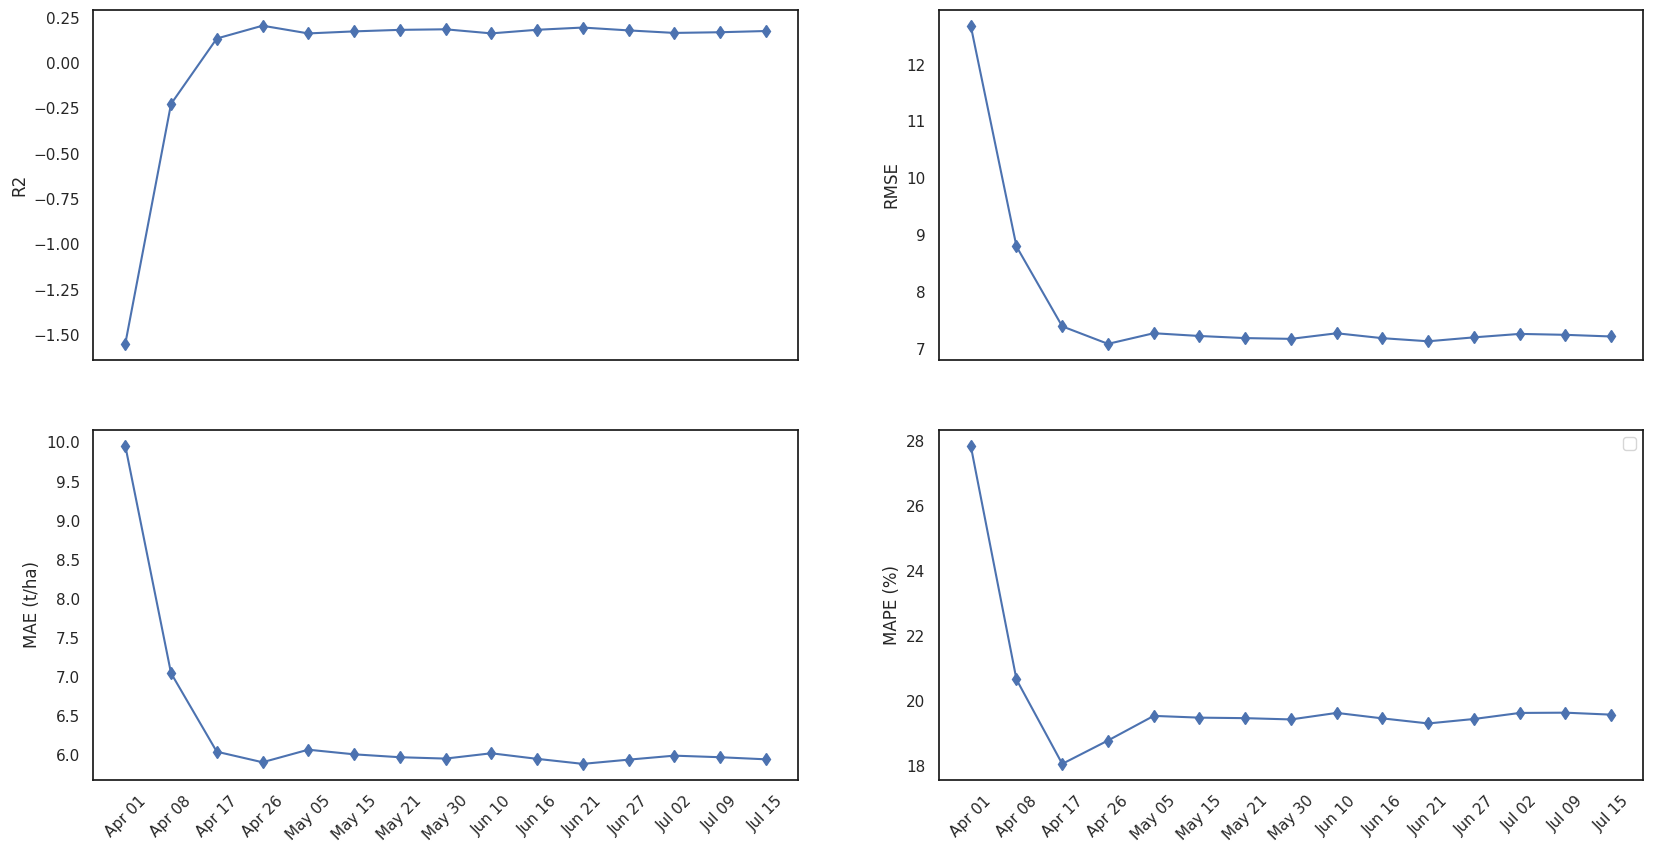

weeks   R2_mean  MAE_mean  RMSE_mean  MAPE_mean
0   Apr 01 -1.549537  9.956173  12.679762  27.844031
1   Apr 08 -0.226992  7.044218   8.796325  20.662801
2   Apr 17  0.133729  6.038122   7.391069  18.070654
3   Apr 26  0.204484  5.903063   7.082800  18.788396
4   May 05  0.161862  6.063796   7.270062  19.544551
5   May 15  0.173058  6.004722   7.221345  19.490700
6   May 21  0.181476  5.967494   7.184493  19.474842
7   May 30  0.184580  5.950009   7.170858  19.435649
8   Jun 10  0.162043  6.017992   7.269277  19.636206
9   Jun 16  0.181861  5.946765   7.182805  19.467570
10  Jun 21  0.194199  5.882374   7.128439  19.312271
11  Jun 27  0.178541  5.936235   7.197363  19.449243
12  Jul 02  0.164626  5.987500   7.258067  19.634945
13  Jul 09  0.168346  5.967493   7.241889  19.643163
14  Jul 15  0.175047  5.940660   7.212652  19.582487

In [7]:
byho2.time_series_plot()

In [8]:
_ = byho2.mape_per_yield_range(th1 = MIN_EXTREME_VALUE_Threshold, 
                                             th2 = Max_EXTREME_VALUE_Threshold)

C1 num samples: 78656 | C2 num samples: 1488244 | C3 num samples: 20300
C1 is yield value between 0 and 22.24, C2 is yield value between 22.24 and 54.36, and C3 is yield value bigger than 54.36
All: MAE = 5.94, MAPE = 19.58 | C1: MAE = 8.20, MAPE = 38.74 | C2: MAE = 5.72, MAPE = 18.52 | C3: MAE = 13.29, MAPE = 23.55


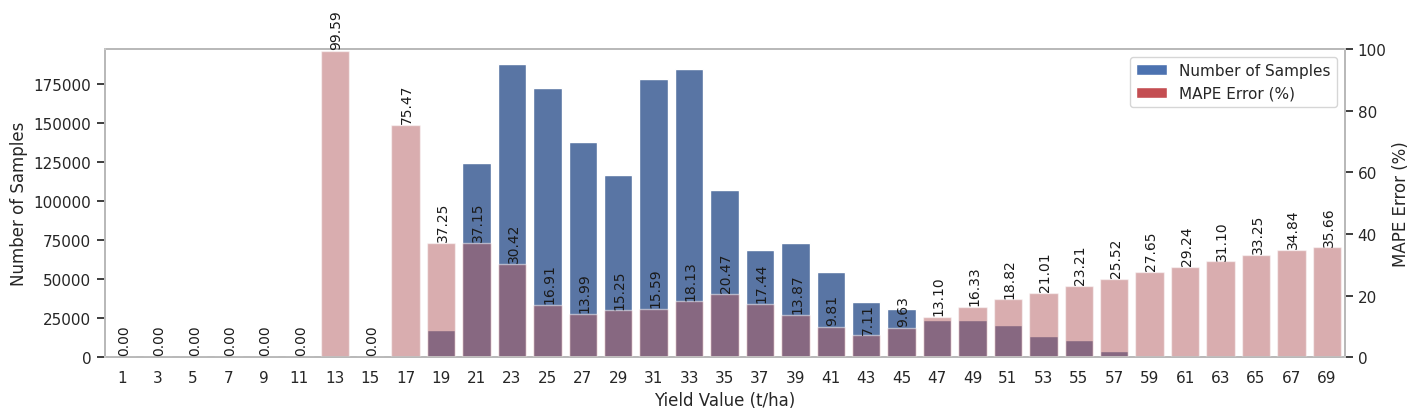

In [9]:
_ = byho2.mape_per_bin_plot()

## General Plots

In [10]:
tplot = inf.multi_model_timeseries_plot()

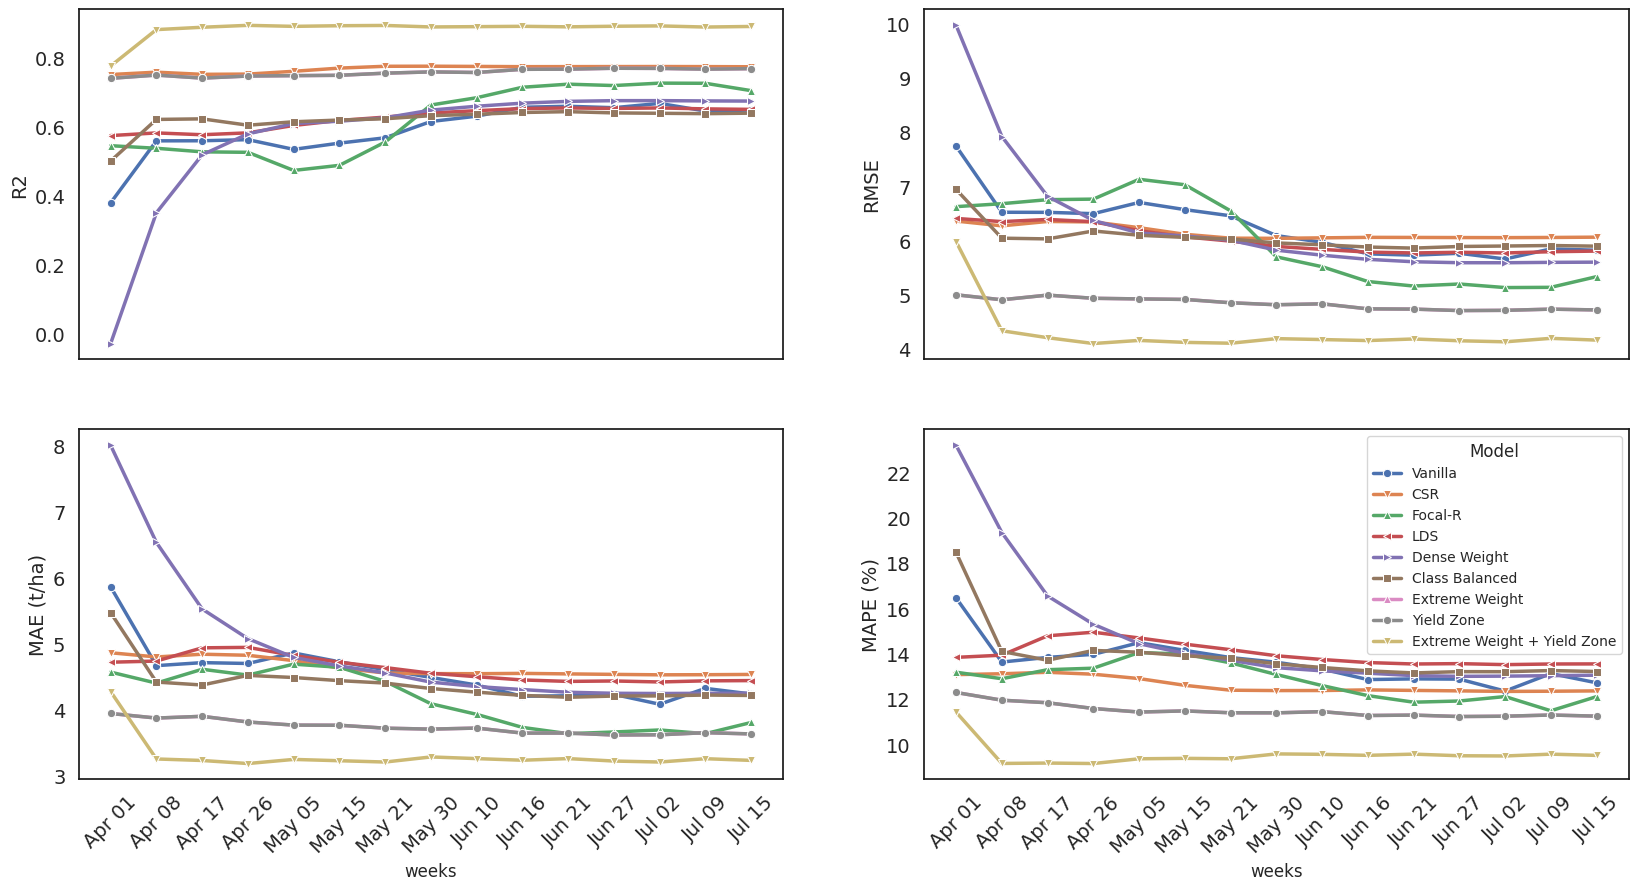

In [12]:
tplot.plot()

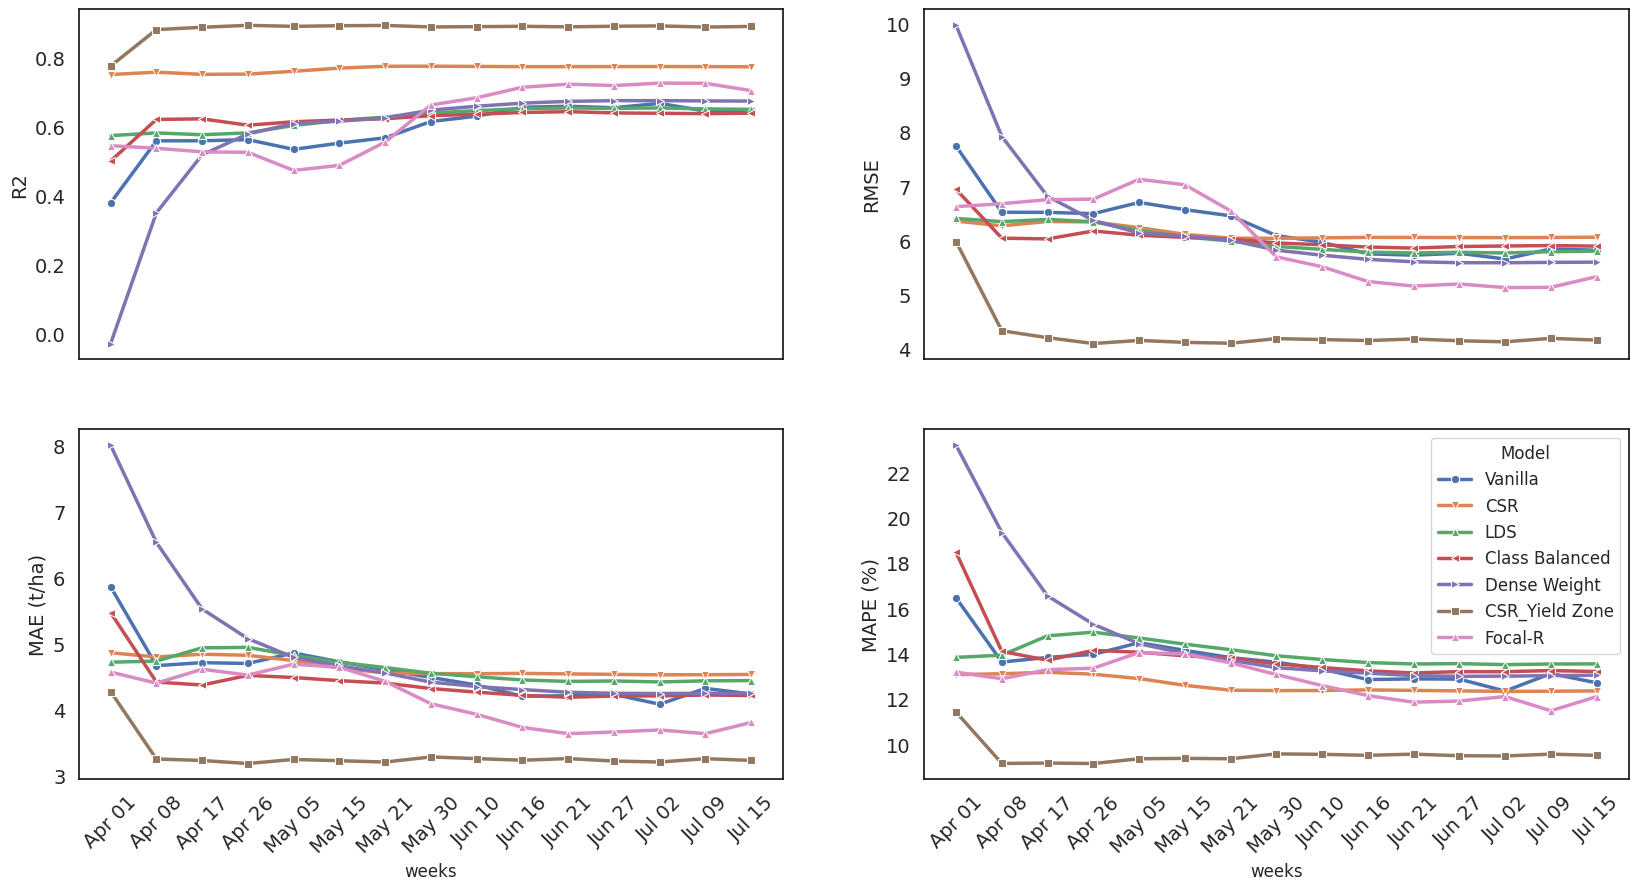

In [4]:
tplot.plot()